**Telecom Churn Prediction**
==========================

**Problem Statement**
-------------------

### Goal

Build a machine learning model to predict high-risk customers likely to churn based on usage features.

### Context

* High competitive market with 15-25% annual churn rate
* Customer retention crucial due to high acquisition costs (5-10 times more)
* Identify indicators of churn to take corrective actions

### Customer Churn Phases

#### 1. Good phase

* Happy customer, usual behavior (first two months)

#### 2. Action phase

* Customer experience deteriorates, different behavior (third month)

#### 3. Churn phase

* Customer churns (fourth month, September)

**Key Objectives**
------------------

1. **Predict customers at high risk of churn**
2. **Identify main indicators of churn**
3. **Develop a machine learning model using customer-level data**

**Next Steps**
--------------

### 1. Explore and Preprocess the Dataset

### 2. Feature Engineering and Selection

### 3. Train and Evaluate Machine Learning Models

### 4. Identify Key Indicators of Churn and Recommend Corrective Actions


In [339]:
#Data Structures
import pandas as pd
import numpy as np
import re
import os

### For installing missingno library, type this command in terminal
#pip install missingno

#import missingno as msno

#Sklearn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score

#Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

#Others
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### Loading Data

In [340]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
train = pd.read_csv("train.csv")
unseen = pd.read_csv("test.csv")
sample = pd.read_csv("sample.csv")
data_dict = pd.read_csv("data_dictionary.csv")

print(train.shape)
print(unseen.shape)
print(sample.shape)
print(data_dict.shape)

(69999, 172)
(30000, 171)
(30000, 2)
(36, 2)


In [341]:
data_dict

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belo...
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile...
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center



**Telecom Churn Prediction: Feature Description**
=============================================

The dataset contains 35 Acronyms, which can be categorized into:

### 1. Customer Information

* **CIRCLE_ID**: Telecom circle area to which the customer belongs
* **AON**: Age on network (number of days the customer is using the operator T network)

### 2. Call Usage

* **LOC**: Local calls within same telecom circle
* **STD**: STD calls outside the calling circle
* **IC**: Incoming calls
* **OG**: Outgoing calls
* **T2T**: Operator T to T (within same operator mobile to mobile)
* **T2M**: Operator T to other operator mobile
* **T2O**: Operator T to other operator fixed line
* **T2F**: Operator T to fixed lines of T
* **T2C**: Operator T to its own call center
* **ONNET**: All kind of calls within the same operator network
* **OFFNET**: All kind of calls outside the operator T network
* **ROAM**: Indicates that customer is in roaming zone during the call
* **SPL**: Special calls
* **ISD**: ISD calls

### 3. Revenue and Usage

* **ARPU**: Average revenue per user
* **MOU**: Minutes of usage (voice calls)
* **DATA**: Mobile internet usage
* **VOL**: Mobile internet usage volume in MB
* **2G**: 2G network usage
* **3G**: 3G network usage

### 4. Recharge and Plans

* **RECH**: Recharge
* **NUM**: Number
* **AMT**: Amount in local currency
* **MAX**: Maximum
* **PCK**: Prepaid service schemes (PACKS)
* **NIGHT**: Scheme to use during specific night hours only
* **MONTHLY**: Service schemes with validity equivalent to a month
* **SACHET**: Service schemes with validity smaller than a month

### 5. KPIs (June, July, August)

* **.6**: KPI for the month of June
* **.7**: KPI for the month of July
* **.8**: KPI for the month of August

### 6. Additional Features

* **FB_USER**: Service scheme to avail services of Facebook and similar social networking sites
* **VBC**: Volume-based cost when no specific scheme is not purchased and paid as per usage

In [342]:
train.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [343]:
train.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [344]:
def metadata_matrix(data: pd.DataFrame) -> pd.DataFrame:
    """
    Generate a metadata matrix for the input DataFrame.

    The matrix contains information about each column, including:
    - Datatype: The data type of the column.
    - Non_Null_Count: The number of non-null values in the column.
    - Null_Count: The number of null values in the column.
    - Null_Percentage: The percentage of null values in the column.
    - Unique_Values_Count: The number of unique values in the column.

    The matrix is sorted by Null_Percentage in descending order.

    Parameters:
    data (pd.DataFrame): The input DataFrame.

    Returns:
    pd.DataFrame: The metadata matrix.
    """
    return pd.DataFrame({
        'DataType': data.dtypes.astype(str),
        'Non_Null_Count': data.count(axis=0).astype(int),
        'Null_Count': data.isnull().sum().astype(int),
        'Null_Percentage': round(data.isnull().sum() / len(data) * 100, 2),
        'Unique_Values_Count': data.nunique().astype(int)
    }).sort_values(by='Null_Percentage', ascending=False)

metadata_matrix(train)

,DataType,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
arpu_3g_6,float64,17568,52431,74.90,5506
count_rech_2g_6,float64,17568,52431,74.90,30
night_pck_user_6,float64,17568,52431,74.90,2
arpu_2g_6,float64,17568,52431,74.90,5389
date_of_last_rech_data_6,object,17568,52431,74.90,30
total_rech_data_6,float64,17568,52431,74.90,36
av_rech_amt_data_6,float64,17568,52431,74.90,792
max_rech_data_6,float64,17568,52431,74.90,47
count_rech_3g_6,float64,17568,52431,74.90,23
fb_user_6,float64,17568,52431,74.90,2



This metadata matrix provides a summary of each column in the dataset. Here are some key observations:

### Columns with high null percentages (>70%)
* Most columns have high null percentages, ranging from 73.69% to 74.90%. This suggests that many values are missing in these columns.

### Columns with low null percentages (<5%)
* The following columns have relatively low null percentages:
	+ `isd_og_mou_8`, `std_ic_t2o_mou_8`, `std_og_t2c_mou_8`, `std_og_mou_8`, and other similar columns with `_8` suffix (null percentage: 5.29%)
	+ `std_ic_t2m_mou_6`, `std_ic_t2t_mou_6`, and other similar columns with `_6` suffix (null percentage: 3.95%)
	+ `roam_og_mou_7`, `ic_others_7`, and other similar columns with `_7` suffix (null percentage: 3.84%)
	+ `date_of_last_rech_8`, `date_of_last_rech_7`, `date_of_last_rech_6` (null percentage: 1.57% to 3.52%)
	+ `last_date_of_month_8`, `last_date_of_month_7`, `last_date_of_month_6` (null percentage: 0.57% to 1.05%)

### Columns with unique values
* `id` has 69,999 unique values, which is equal to the total number of rows, suggesting that it's a unique identifier column.
* `churn_probability` has only 2 unique values, indicating a binary classification problem.
* `monthly_2g_6`, `monthly_2g_7`, `monthly_2g_8` have only 5, 6, and 6 unique values, respectively, suggesting categorical variables.
* `sachet_3g_8`, `sachet_3g_7`, `sachet_3g_6` have only 28, 26, and 23 unique values, respectively, suggesting categorical variables.

These observations can help guide further data exploration, feature engineering, and model selection for churn prediction.

## Data Cleaning and Preparation


**Data Cleaning and Preparation Steps**
=====================================

### Handling Missing Values

* Identify columns with high null percentages (>70%) and consider:
	+ Removing them
	+ Imputing missing values using mean, median, or imputation algorithms
* For columns with lower null percentages (<5%), consider:
	+ Imputing missing values using mean, median, or imputation algorithms

### Data Type Conversion

* Convert columns with inconsistent data types (e.g., object type for columns that should be float or int) to their appropriate types
* Convert date columns to a standard format (e.g., YYYY-MM-DD)

### Handling Outliers

* Identify and handle outliers in numerical columns using techniques such as:
	+ Winsorization
	+ Trimming
	+ Transforming data

### Feature Engineering

* Extract relevant features from existing columns (e.g., extract month and year from date columns)
* Create new features that may be relevant for churn prediction (e.g., average revenue per user, total data usage)

### Encoding Categorical Variables

* Use techniques such as:
	+ One-hot encoding
	+ Label encoding
	+ Binary encoding
to convert categorical variables into numerical variables

### Scaling and Normalization

* Scale numerical columns to a common range (e.g., 0-1) using techniques such as:
	+ Min-max scaling
	+ Standardization

### Remove Duplicate Rows

* Remove any duplicate rows that may exist in the dataset


**Checking for Missing Values**

In [345]:
missing_values = metadata_matrix(train)[['DataType', 'Null_Percentage']].sort_values(by='Null_Percentage', ascending=False)
print(missing_values)

                         DataType  Null_Percentage
arpu_3g_6                 float64            74.90
night_pck_user_6          float64            74.90
arpu_2g_6                 float64            74.90
date_of_last_rech_data_6   object            74.90
total_rech_data_6         float64            74.90
av_rech_amt_data_6        float64            74.90
max_rech_data_6           float64            74.90
count_rech_3g_6           float64            74.90
fb_user_6                 float64            74.90
count_rech_2g_6           float64            74.90
count_rech_2g_7           float64            74.48
arpu_2g_7                 float64            74.48
av_rech_amt_data_7        float64            74.48
arpu_3g_7                 float64            74.48
count_rech_3g_7           float64            74.48
total_rech_data_7         float64            74.48
fb_user_7                 float64            74.48
max_rech_data_7           float64            74.48
date_of_last_rech_data_7   obje

**Drop Columns with High Missing Values**

In [346]:
missing_value_columns = metadata_matrix(train)[['DataType', 'Null_Percentage']].loc[lambda x : x['Null_Percentage']>70]


In [347]:
high_missing_value_columns = missing_value_columns.index.tolist() 

In [348]:
high_missing_value_columns

['arpu_3g_6',
 'count_rech_2g_6',
 'night_pck_user_6',
 'arpu_2g_6',
 'date_of_last_rech_data_6',
 'total_rech_data_6',
 'av_rech_amt_data_6',
 'max_rech_data_6',
 'count_rech_3g_6',
 'fb_user_6',
 'night_pck_user_7',
 'date_of_last_rech_data_7',
 'total_rech_data_7',
 'max_rech_data_7',
 'fb_user_7',
 'count_rech_2g_7',
 'count_rech_3g_7',
 'arpu_3g_7',
 'av_rech_amt_data_7',
 'arpu_2g_7',
 'count_rech_2g_8',
 'av_rech_amt_data_8',
 'night_pck_user_8',
 'max_rech_data_8',
 'total_rech_data_8',
 'arpu_2g_8',
 'arpu_3g_8',
 'date_of_last_rech_data_8',
 'fb_user_8',
 'count_rech_3g_8']

In [349]:

train.drop(columns=high_missing_value_columns, inplace=True)

**Check Number of Columns in Training Data**
------------------------------------------

In [350]:
train.shape

(69999, 142)

In [351]:
metadata=metadata_matrix(train)
metadata

,DataType,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
roam_og_mou_8,float64,66296,3703,5.29,5215
og_others_8,float64,66296,3703,5.29,179
spl_og_mou_8,float64,66296,3703,5.29,3848
loc_ic_t2t_mou_8,float64,66296,3703,5.29,11446
loc_og_t2m_mou_8,float64,66296,3703,5.29,17616
loc_og_t2c_mou_8,float64,66296,3703,5.29,2204
loc_ic_t2m_mou_8,float64,66296,3703,5.29,19022
loc_og_t2t_mou_8,float64,66296,3703,5.29,11296
loc_ic_t2f_mou_8,float64,66296,3703,5.29,6092
std_og_t2f_mou_8,float64,66296,3703,5.29,1945


# Find columns with single unique values


In [352]:
# Find columns with single unique values
single_value_columns = [col for col in train.columns if train[col].nunique() == 1]
print(single_value_columns)

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


In [353]:
train.drop(columns=single_value_columns,inplace=True)

# Select columns that do not end with 6, 7, or 8

In [354]:
columns_six_seven_eight = [col for col in train.columns if not col.endswith(('6', '7', '8'))]

In [355]:
columns_six_seven_eight

['id', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability']

In [356]:
train.drop(columns=['id'],inplace=True)

# Rename columns with month number at the end

In [357]:
train = train.rename(columns={
    'aug_vbc_3g': 'vbc_3g_8',
    'jul_vbc_3g': 'vbc_3g_7',
    'jun_vbc_3g': 'vbc_3g_6'
})

In [358]:
def extract_month_metadata(df, month_number):
    """
    Extract metadata for columns in the dataframe that correspond to a specific month.

    Args:
        df (DataFrame): Input dataframe.
        month_number (int): Month number (1-12) to extract metadata for.

    Returns:
        DataFrame: Filtered metadata for columns corresponding to the specified month.
    """
    # Extract column names that end with the specified month number
    month_columns = [col for col in df.columns if re.search(f"{month_number}$", col)]

    # Create a metadata matrix from the dataframe
    metadata = metadata_matrix(df)

    # Filter the metadata matrix to only include columns that end with the specified month number
    month_metadata = metadata[metadata.index.isin(month_columns)]

    return month_metadata

In [359]:
def extract_object_column_metadata(metadata):
    """
    Extract metadata for object-type columns from the given metadata.

    Args:
        metadata (DataFrame): Input metadata.

    Returns:
        DataFrame: Metadata for object-type columns.
    """
    object_columns = metadata.select_dtypes(include=['object']).columns
    return metadata[metadata.columns.isin(object_columns)]

# Extract metadata for June (6th month)

In [360]:
june_metadata = extract_month_metadata(train, 6)

In [361]:
june_metadata

,DataType,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
std_ic_t2m_mou_6,float64,67231,2768,3.95,7931
std_og_mou_6,float64,67231,2768,3.95,21837
spl_og_mou_6,float64,67231,2768,3.95,3503
loc_ic_t2m_mou_6,float64,67231,2768,3.95,19034
og_others_6,float64,67231,2768,3.95,914
isd_og_mou_6,float64,67231,2768,3.95,1103
std_ic_t2f_mou_6,float64,67231,2768,3.95,2624
std_og_t2f_mou_6,float64,67231,2768,3.95,2074
loc_ic_mou_6,float64,67231,2768,3.95,24442
loc_og_mou_6,float64,67231,2768,3.95,22309


In [362]:
june_object_data = june_metadata[june_metadata['DataType'] == 'object']

In [363]:
june_object_data

,DataType,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_6,object,68898,1101,1.57,30


# Extract metadata for July (7th month)

In [364]:
july_metadata = extract_month_metadata(train, 7)

In [365]:
july_metadata

,DataType,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
loc_ic_mou_7,float64,67312,2687,3.84,24258
std_ic_t2t_mou_7,float64,67312,2687,3.84,5479
std_ic_t2m_mou_7,float64,67312,2687,3.84,8033
std_ic_t2f_mou_7,float64,67312,2687,3.84,2695
spl_ic_mou_7,float64,67312,2687,3.84,103
isd_ic_mou_7,float64,67312,2687,3.84,4640
ic_others_7,float64,67312,2687,3.84,1658
std_ic_mou_7,float64,67312,2687,3.84,10112
spl_og_mou_7,float64,67312,2687,3.84,3827
loc_ic_t2f_mou_7,float64,67312,2687,3.84,6287


In [366]:
july_object_data = july_metadata[july_metadata['DataType'] == 'object']

In [367]:
july_object_data

,DataType,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_7,object,68765,1234,1.76,31


# Extract metadata for August (8th month)

In [368]:
august_metadata = extract_month_metadata(train, 8)

In [369]:
august_metadata

,DataType,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
isd_og_mou_8,float64,66296,3703,5.29,1008
std_ic_t2m_mou_8,float64,66296,3703,5.29,7906
std_ic_t2f_mou_8,float64,66296,3703,5.29,2583
std_og_t2f_mou_8,float64,66296,3703,5.29,1945
std_og_t2t_mou_8,float64,66296,3703,5.29,14483
loc_ic_t2f_mou_8,float64,66296,3703,5.29,6092
loc_og_mou_8,float64,66296,3703,5.29,21950
std_ic_mou_8,float64,66296,3703,5.29,9939
loc_og_t2c_mou_8,float64,66296,3703,5.29,2204
std_og_mou_8,float64,66296,3703,5.29,21745


In [370]:
august_object_data = august_metadata[august_metadata['DataType'] == 'object']

In [371]:
august_object_data

,DataType,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_8,object,67538,2461,3.52,31


In [372]:
columns=train.columns
col_with_date=[]
import re
for column in columns:
    x = re.findall("^date", column)
    if x:
        col_with_date.append(column)
train[col_with_date].dtypes

date_of_last_rech_6    object
date_of_last_rech_7    object
date_of_last_rech_8    object
dtype: object

In [373]:
train[['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']] = train[['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']].apply(pd.to_datetime, format="%m/%d/%Y")

In [374]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
def impute_with_knn(df, columns_to_impute, n_neighbors=5):
    """
    Impute missing values using KNN.

    Args:
        df (pd.DataFrame): Input DataFrame.
        columns_to_impute (list): List of columns to impute.
        n_neighbors (int, optional): Number of nearest neighbors. Defaults to 5.

    Returns:
        pd.DataFrame: DataFrame with imputed missing values.
    """
    # Create a KNN imputer
    knn_imputer = KNNImputer(n_neighbors=n_neighbors)

    # Scale the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df[columns_to_impute])

    # Impute missing values
    imputed_data = knn_imputer.fit_transform(scaled_data)

    # Inverse scale the imputed data
    imputed_data = scaler.inverse_transform(imputed_data)

    # Replace missing values in the original dataframe
    df[columns_to_impute] = imputed_data

    return df


In [375]:
misssing_value_columns = metadata_matrix(train)[['DataType', 'Null_Percentage']].loc[lambda x: x['Null_Percentage'] > 0]


In [376]:
misssing_value_columns

,DataType,Null_Percentage
isd_og_mou_8,float64,5.29
std_ic_t2m_mou_8,float64,5.29
std_ic_t2f_mou_8,float64,5.29
std_og_t2f_mou_8,float64,5.29
std_og_t2t_mou_8,float64,5.29
loc_ic_t2f_mou_8,float64,5.29
loc_og_mou_8,float64,5.29
std_ic_mou_8,float64,5.29
loc_og_t2c_mou_8,float64,5.29
std_og_mou_8,float64,5.29


In [377]:
misssing_value_columns.shape

(84, 2)

In [378]:
misssing_value_columns.info()

<class 'pandas.core.frame.DataFrame'>
Index: 84 entries, isd_og_mou_8 to date_of_last_rech_6
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DataType         84 non-null     object 
 1   Null_Percentage  84 non-null     float64
dtypes: float64(1), object(1)
memory usage: 2.0+ KB


In [379]:
missing_value_columns = metadata_matrix(train)[['DataType', 'Null_Percentage']].loc[lambda x: (x['Null_Percentage'] > 0)]

In [380]:
column_names = misssing_value_columns.index.tolist()
column_names

['isd_og_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_t2f_mou_8',
 'std_og_t2f_mou_8',
 'std_og_t2t_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_og_mou_8',
 'std_ic_mou_8',
 'loc_og_t2c_mou_8',
 'std_og_mou_8',
 'loc_og_t2f_mou_8',
 'loc_ic_mou_8',
 'loc_og_t2m_mou_8',
 'spl_ic_mou_8',
 'loc_og_t2t_mou_8',
 'std_og_t2m_mou_8',
 'offnet_mou_8',
 'og_others_8',
 'ic_others_8',
 'loc_ic_t2m_mou_8',
 'spl_og_mou_8',
 'std_ic_t2t_mou_8',
 'roam_ic_mou_8',
 'isd_ic_mou_8',
 'onnet_mou_8',
 'roam_og_mou_8',
 'loc_ic_t2t_mou_8',
 'std_ic_t2m_mou_6',
 'std_og_mou_6',
 'spl_og_mou_6',
 'loc_ic_t2m_mou_6',
 'og_others_6',
 'isd_og_mou_6',
 'std_ic_t2f_mou_6',
 'std_og_t2f_mou_6',
 'loc_ic_mou_6',
 'loc_og_mou_6',
 'std_ic_mou_6',
 'loc_og_t2t_mou_6',
 'onnet_mou_6',
 'loc_ic_t2f_mou_6',
 'offnet_mou_6',
 'ic_others_6',
 'roam_ic_mou_6',
 'roam_og_mou_6',
 'isd_ic_mou_6',
 'std_og_t2m_mou_6',
 'loc_og_t2m_mou_6',
 'loc_og_t2f_mou_6',
 'loc_og_t2c_mou_6',
 'spl_ic_mou_6',
 'loc_ic_t2t_mou_6',
 'std_og_t2t_mou_6',
 

In [381]:
columns_to_impute = ['isd_og_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_og_t2f_mou_8', 'std_og_t2t_mou_8', 'loc_ic_t2f_mou_8', 'loc_og_mou_8', 'std_ic_mou_8', 'loc_og_t2c_mou_8', 'std_og_mou_8', 'loc_og_t2f_mou_8', 'loc_ic_mou_8', 'loc_og_t2m_mou_8', 'spl_ic_mou_8', 'loc_og_t2t_mou_8', 'std_og_t2m_mou_8', 'offnet_mou_8', 'og_others_8', 'ic_others_8', 'loc_ic_t2m_mou_8', 'spl_og_mou_8', 'std_ic_t2t_mou_8', 'roam_ic_mou_8', 'isd_ic_mou_8', 'onnet_mou_8', 'roam_og_mou_8', 'loc_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_og_mou_6', 'spl_og_mou_6', 'loc_ic_t2m_mou_6', 'og_others_6', 'isd_og_mou_6', 'std_ic_t2f_mou_6', 'std_og_t2f_mou_6', 'loc_ic_mou_6', 'loc_og_mou_6', 'std_ic_mou_6', 'loc_og_t2t_mou_6', 'onnet_mou_6', 'loc_ic_t2f_mou_6', 'offnet_mou_6', 'ic_others_6', 'roam_ic_mou_6', 'roam_og_mou_6', 'isd_ic_mou_6', 'std_og_t2m_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'spl_ic_mou_6', 'loc_ic_t2t_mou_6', 'std_og_t2t_mou_6', 'std_ic_t2t_mou_6', 'loc_ic_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7', 'std_ic_mou_7', 'spl_og_mou_7', 'loc_ic_t2f_mou_7', 'std_og_t2m_mou_7', 'onnet_mou_7', 'offnet_mou_7', 'roam_ic_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'std_og_t2t_mou_7', 'loc_og_mou_7', 'std_og_t2f_mou_7', 'isd_og_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2t_mou_7', 'std_og_mou_7', 'og_others_7']
train_impute = impute_with_knn(train, columns_to_impute, n_neighbors=5)

In [382]:
metadata=metadata_matrix(train_impute)

In [383]:
metadata

,DataType,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_8,datetime64[ns],67538,2461,3.52,31
date_of_last_rech_7,datetime64[ns],68765,1234,1.76,31
date_of_last_rech_6,datetime64[ns],68898,1101,1.57,30
arpu_6,float64,69999,0,0.00,61615
spl_ic_mou_6,float64,69999,0,0.00,249
total_rech_num_8,int64,69999,0,0.00,92
total_rech_num_7,int64,69999,0,0.00,96
total_rech_num_6,int64,69999,0,0.00,94
ic_others_8,float64,69999,0,0.00,2048
ic_others_7,float64,69999,0,0.00,2068


In [384]:
unique_values = train_impute['date_of_last_rech_6'].unique()
print(unique_values)

<DatetimeArray>
['2014-06-22 00:00:00', '2014-06-12 00:00:00', '2014-06-11 00:00:00',
 '2014-06-15 00:00:00', '2014-06-25 00:00:00', '2014-06-30 00:00:00',
 '2014-06-29 00:00:00', '2014-06-20 00:00:00', '2014-06-28 00:00:00',
 '2014-06-27 00:00:00', '2014-06-26 00:00:00', '2014-06-19 00:00:00',
 '2014-06-23 00:00:00', '2014-06-24 00:00:00', '2014-06-14 00:00:00',
                 'NaT', '2014-06-05 00:00:00', '2014-06-08 00:00:00',
 '2014-06-06 00:00:00', '2014-06-16 00:00:00', '2014-06-13 00:00:00',
 '2014-06-18 00:00:00', '2014-06-21 00:00:00', '2014-06-17 00:00:00',
 '2014-06-10 00:00:00', '2014-06-07 00:00:00', '2014-06-02 00:00:00',
 '2014-06-01 00:00:00', '2014-06-03 00:00:00', '2014-06-09 00:00:00',
 '2014-06-04 00:00:00']
Length: 31, dtype: datetime64[ns]


The columns 'date_of_last_rech' for june,july and August does not have any value becuase there are no recharges done by the user during those months.

Dropping columns with one unique value.


In [385]:
metadata=metadata_matrix(train_impute)
singular_value_cols=metadata[metadata['Unique_Values_Count']==1].index.values

In [386]:
singular_value_cols

array([], dtype=object)

In [387]:
# Dropping date columns 
# since they are not usage related columns and can't be used for modelling 
date_columns = train_impute.filter(regex='^date.*').columns
train_impute.drop(columns=date_columns, inplace=True)
metadata_matrix(train_impute)


,DataType,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
arpu_6,float64,69999,0,0.0,61615
total_ic_mou_7,float64,69999,0,0.0,27418
total_rech_num_8,int64,69999,0,0.0,92
total_rech_num_7,int64,69999,0,0.0,96
total_rech_num_6,int64,69999,0,0.0,94
ic_others_8,float64,69999,0,0.0,2048
ic_others_7,float64,69999,0,0.0,2068
ic_others_6,float64,69999,0,0.0,1935
isd_ic_mou_8,float64,69999,0,0.0,5467
isd_ic_mou_7,float64,69999,0,0.0,5213


In [388]:
train_impute['Churn'] = train_impute['churn_probability'].astype('category')

In [390]:
metdata=metadata_matrix(train_impute)

In [392]:
metadata

,DataType,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
date_of_last_rech_8,datetime64[ns],67538,2461,3.52,31
date_of_last_rech_7,datetime64[ns],68765,1234,1.76,31
date_of_last_rech_6,datetime64[ns],68898,1101,1.57,30
arpu_6,float64,69999,0,0.00,61615
spl_ic_mou_6,float64,69999,0,0.00,249
total_rech_num_8,int64,69999,0,0.00,92
total_rech_num_7,int64,69999,0,0.00,96
total_rech_num_6,int64,69999,0,0.00,94
ic_others_8,float64,69999,0,0.00,2048
ic_others_7,float64,69999,0,0.00,2068


In [393]:
change_to_cat=metadata[metadata['Unique_Values_Count']<29].index.values

In [394]:
change_to_cat

array(['sachet_3g_8', 'sachet_3g_7', 'sachet_3g_6', 'monthly_3g_8',
       'monthly_3g_7', 'monthly_3g_6', 'monthly_2g_8', 'monthly_2g_7',
       'monthly_2g_6', 'churn_probability'], dtype=object)

In [395]:
# Converting all the above columns having <=29 unique values into categorical data type.
train_impute[change_to_cat]=train_impute[change_to_cat].astype('category')

In [396]:
metdata=metadata_matrix(train_impute)

In [397]:
metdata

,DataType,Non_Null_Count,Null_Count,Null_Percentage,Unique_Values_Count
arpu_6,float64,69999,0,0.0,61615
total_ic_mou_7,float64,69999,0,0.0,27418
total_rech_num_8,int64,69999,0,0.0,92
total_rech_num_7,int64,69999,0,0.0,96
total_rech_num_6,int64,69999,0,0.0,94
ic_others_8,float64,69999,0,0.0,2048
ic_others_7,float64,69999,0,0.0,2068
ic_others_6,float64,69999,0,0.0,1935
isd_ic_mou_8,float64,69999,0,0.0,5467
isd_ic_mou_7,float64,69999,0,0.0,5213


In [398]:
# Remove Column churn_probability
train_impute.drop('churn_probability', axis=1, inplace=True)

In [399]:
train_impute.shape

(69999, 125)

### Filtering High Value Customers
Customers are High Values if their Average recharge amount of june and july is more than or equal to 70th percentile of Average recharge amount.

In [400]:
#Deriving Average recharge amount of June and July.
train_impute['Average_rech_amt_6n7']=(train_impute['total_rech_amt_6']+train_impute['total_rech_amt_7'])/2

In [401]:
#Filtering based HIGH VALUED CUSTOMERS based on (Average_rech_amt_6n7 >= 70th percentile of Average_rech_amt_6n7)
high_value_customer=train_impute[(train_impute['Average_rech_amt_6n7']>= train_impute['Average_rech_amt_6n7'].quantile(0.7))]

In [292]:
high_value_customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21018 entries, 12 to 69996
Columns: 127 entries, arpu_6 to Average_rech_amt_6n7
dtypes: category(11), float64(100), int64(16)
memory usage: 19.0 MB


### Exploratory Data Analysis

In [402]:
train_impute.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,Average_rech_amt_6n7
count,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,6.999900e+04,69999.000000,6.999900e+04,6.999900e+04,6.999900e+04,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000,69999.000000,6.999900e+04,69999.000000,6.999900e+04,69999.000000,69999.000000,69999.000000,6.999900e+04,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,6.999900e+04,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,6.999900e+04,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,6.999900e+04,69999.000000,69999.000000,69999.000000,69999.000000,6.999900e+04,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,283.134365,278.185912,278.858826,133.516971,133.094499,132.333204,198.713801,195.910969,195.567036,9.735484,7.023836,6.978943,14.301313,9.934228,9.792863,46.111242,4.539384e+01,44.685065,9.185968e+01,8.946530e+01,8.936642e+01,3.681078,3.722052,3.587731,1.128828,1.359623,1.426969,141.659255,138.588477,137.646412,81.696621,83.718879,83.833591,89.389283,91.620085,91.400303,1.113283,1.072180,1.03371,172.201930,176.413830,1.762702e+02,0.860043,8.456713e-01,0.882332,3.968475,4.959886,5.049750e+00,0.464886,0.025282,0.032410,306.451436,310.572674,304.513065,47.337204,47.159372,46.440993,105.481255,104.874968,106.123738,11.814859,1.231733e+01,11.436986,164.641992,164.360427,164.010487,9.437582,9.802401,9.822098,20.653074,21.589401,20.888946,2.104569e+00,2.159954,2.028914,32.197756,33.554325,32.74252

In [403]:
numerical_columns = train_impute.select_dtypes(include=[int, float]).columns
numerical_columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'vol_3g_mb_7', 'vol_3g_mb_8', 'sachet_2g_6', 'sachet_2g_7',
       'sachet_2g_8', 'aon', 'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6',
       'Average_rech_amt_6n7'],
      dtype='object', length=116)

In [404]:
num_numerical_columns = len(numerical_columns)
print(num_numerical_columns)

116


In [405]:
categorical_columns = train_impute.dtypes[train_impute.dtypes == 'category'].index.values
categorical_columns

array(['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_3g_6',
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'Churn'], dtype=object)

In [406]:
num_categorical_columns = len(categorical_columns)
print(num_categorical_columns)

10


In [407]:
def univariate_analysis(df, numerical_columns):
    analysis_results = {}
    
    for column in numerical_columns:
        print(f"\nUnivariate analysis for column: {column}")
        
        # Calculate and print basic statistics
        stats = {
            'mean': df[column].mean(),
            'median': df[column].median(),
            'variance': df[column].var(),
            'std_dev': df[column].std(),
            'min': df[column].min(),
            'max': df[column].max(),
            'skewness': df[column].skew(),
            'kurtosis': df[column].kurtosis()
        }
        analysis_results[column] = stats
        
        for stat, value in stats.items():
            print(f"{stat.capitalize()}: {value}")
        
        # Plotting
        plt.figure(figsize=(14, 6))
        
        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[column], kde=True)
        plt.title(f'Histogram of {column}')
        
        
        plt.show()
    
    return analysis_results

In [408]:

def univariate_categorical_analysis(df, categorical_columns):
    analysis_results = {}
    
    for column in categorical_columns:
        print(f"\nUnivariate analysis for column: {column}")
        
        # Frequency distribution
        freq_dist = df[column].value_counts()
        
        # Proportion of each category
        proportion = df[column].value_counts(normalize=True)
        
        analysis_results[column] = {
            'frequency': freq_dist,
            'proportion': proportion
        }
        
        print("Frequency Distribution:")
        print(freq_dist)
        
        print("\nProportion of Each Category:")
        print(proportion)
        
        # Plotting
        plt.figure(figsize=(14, 6))
        
        # Bar Plot
        plt.subplot(1, 2, 1)
        sns.countplot(x=df[column], order=freq_dist.index, palette="viridis")
        plt.title(f'Bar Plot of {column}')
        plt.xticks(rotation=45)
        
       
        
        plt.show()
    
    return analysis_results


# Univariate Analysis

# Customer Infomation Analysis


Univariate analysis for column: aon
Mean: 1220.639709138702
Median: 868.0
Variance: 907115.8967893614
Std_dev: 952.426320924281
Min: 180
Max: 4337
Skewness: 0.9439841081180973
Kurtosis: -0.2875013091836167


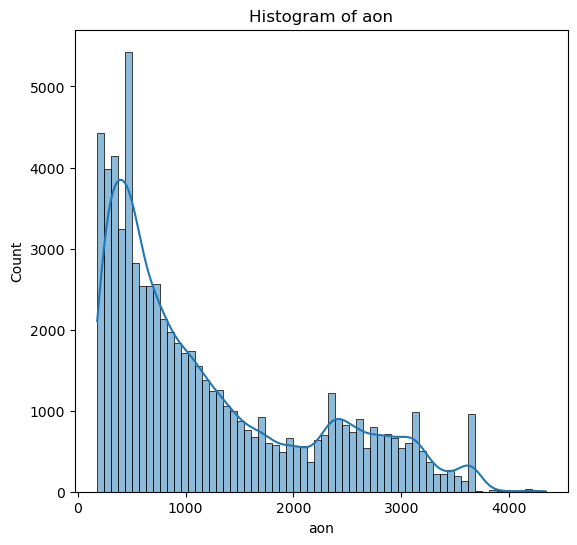

In [409]:
numerical_columns=['aon']
analysis_results = univariate_analysis(train_impute, numerical_columns)

# Call Usages Analysis

In [301]:
# Local Call Analyis

In [410]:
local_call_columns= metadata[metadata.index.str.contains('loc', case=False)].index.values

In [411]:
local_call_columns

array(['loc_ic_mou_8', 'loc_ic_mou_7', 'loc_ic_mou_6', 'loc_og_t2t_mou_7',
       'loc_og_mou_8', 'loc_og_mou_7', 'loc_og_mou_6', 'loc_og_t2c_mou_8',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_6', 'loc_og_t2f_mou_8',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_6', 'loc_og_t2m_mou_8',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_6', 'loc_og_t2t_mou_8',
       'loc_og_t2t_mou_6', 'loc_ic_t2f_mou_8', 'loc_ic_t2f_mou_7',
       'loc_ic_t2f_mou_6', 'loc_ic_t2m_mou_8', 'loc_ic_t2m_mou_7',
       'loc_ic_t2m_mou_6', 'loc_ic_t2t_mou_8', 'loc_ic_t2t_mou_7',
       'loc_ic_t2t_mou_6'], dtype=object)


Univariate analysis for column: loc_ic_mou_8
Mean: 164.01048721611312
Median: 92.54
Variance: 60151.121015916295
Std_dev: 245.25725476714504
Min: 0.0
Max: 10830.16
Skewness: 6.541105360556758
Kurtosis: 110.44775008857408


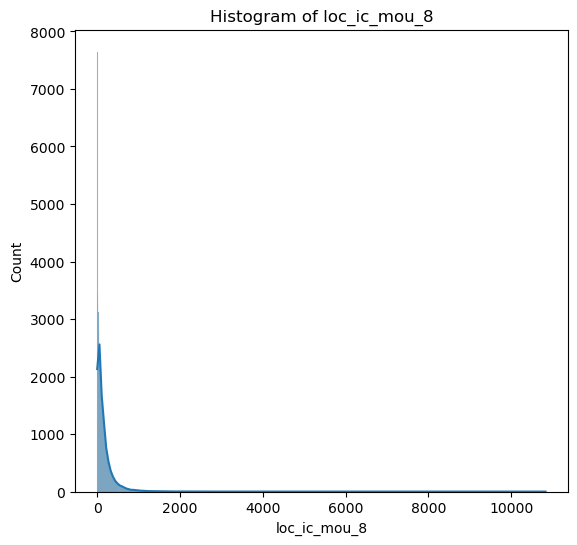


Univariate analysis for column: loc_ic_mou_7
Mean: 164.36042691611104
Median: 91.54
Variance: 63249.2615300653
Std_dev: 251.4940586377048
Min: 0.0
Max: 9669.91
Skewness: 6.528176118293637
Kurtosis: 99.13396996663666


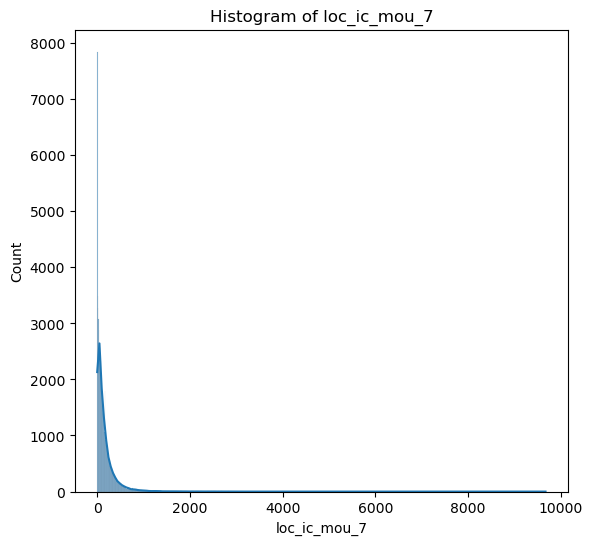


Univariate analysis for column: loc_ic_mou_6
Mean: 164.64199227598124
Median: 91.78
Variance: 61960.492318195014
Std_dev: 248.91864598337148
Min: 0.0
Max: 7454.63
Skewness: 5.760096930825386
Kurtosis: 65.58364250015704


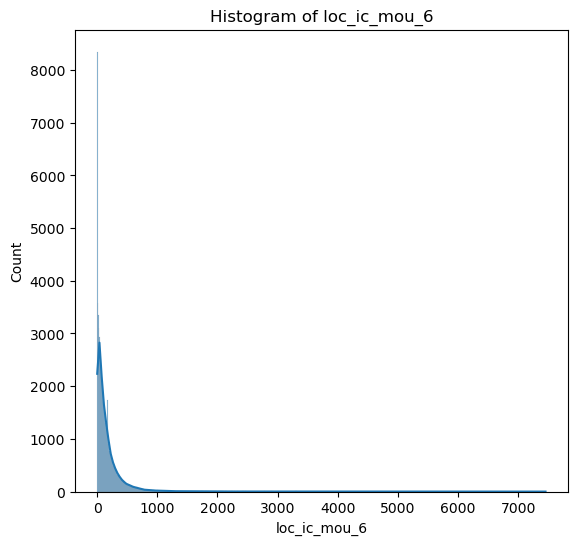


Univariate analysis for column: loc_og_t2t_mou_7
Mean: 45.39384116362449
Median: 11.68
Variance: 23148.4938172897
Std_dev: 152.14629084302285
Min: 7.105427357601002e-15
Max: 7400.66
Skewness: 15.6118762085471
Kurtosis: 404.25523804688345


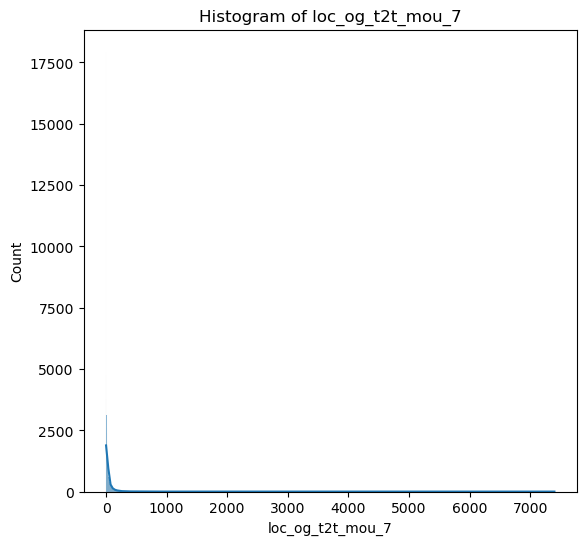


Univariate analysis for column: loc_og_mou_8
Mean: 137.64641235170086
Median: 63.33
Variance: 57634.11174272198
Std_dev: 240.0710556121291
Min: 0.0
Max: 11039.91
Skewness: 7.811872401729774
Kurtosis: 167.26970535836904


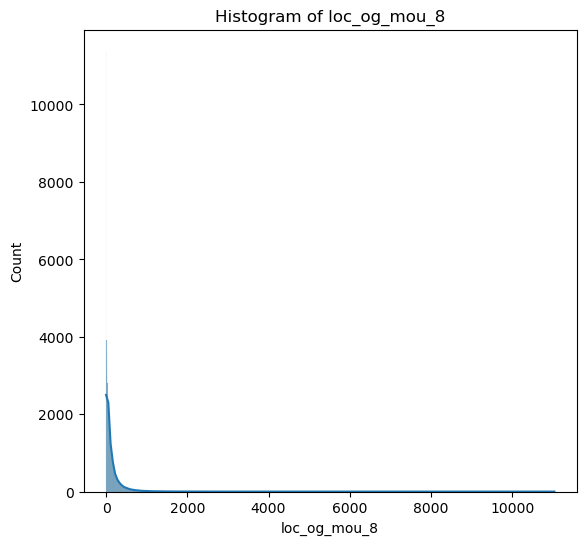


Univariate analysis for column: loc_og_mou_7
Mean: 138.5884769082621
Median: 63.03999999999999
Variance: 58834.30297752453
Std_dev: 242.55783429426586
Min: 0.0
Max: 7674.78
Skewness: 6.476432375664018
Kurtosis: 84.53330362411978


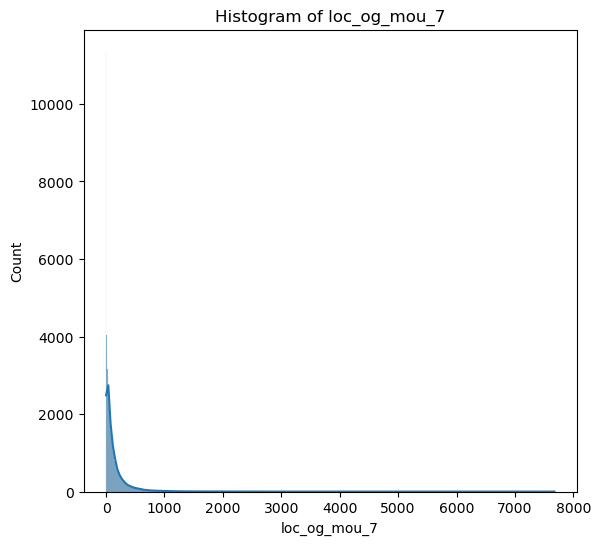


Univariate analysis for column: loc_og_mou_6
Mean: 141.65925526642744
Median: 65.18
Variance: 61388.27838795297
Std_dev: 247.76658045013448
Min: 0.0
Max: 10643.38
Skewness: 6.751849393397453
Kurtosis: 106.04082621795243


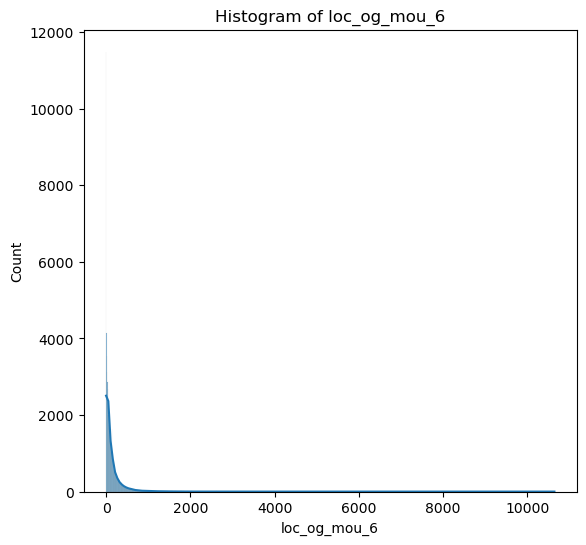


Univariate analysis for column: loc_og_t2c_mou_8
Mean: 1.426969194148687
Median: 0.0
Variance: 41.11254677590713
Std_dev: 6.411906641234503
Min: 0.0
Max: 351.83
Skewness: 17.461816495388828
Kurtosis: 563.1391659538788


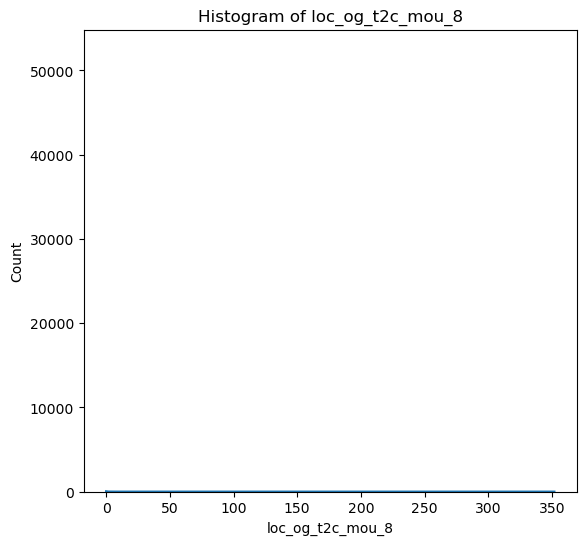


Univariate analysis for column: loc_og_t2c_mou_7
Mean: 1.3596225891252078
Median: 0.0
Variance: 60.414731946652935
Std_dev: 7.772691422322961
Min: 0.0
Max: 916.24
Skewness: 43.21335613029558
Kurtosis: 3696.849579585682


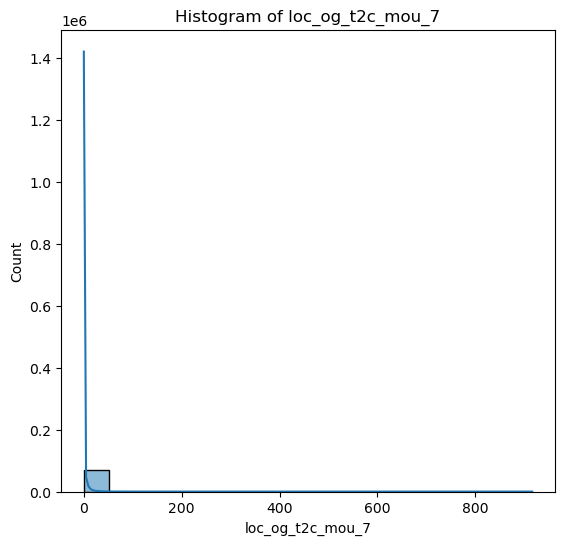


Univariate analysis for column: loc_og_t2c_mou_6
Mean: 1.1288275736024411
Median: 0.0
Variance: 31.89751582320441
Std_dev: 5.647788578125461
Min: 0.0
Max: 342.86
Skewness: 22.711415260500235
Kurtosis: 972.8992659301334


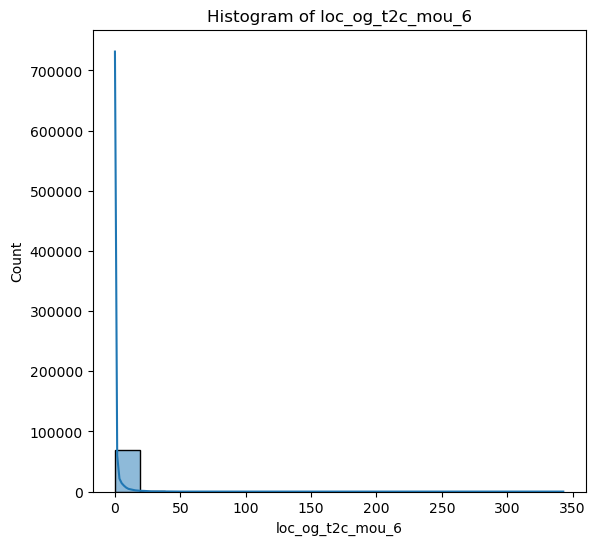


Univariate analysis for column: loc_og_t2f_mou_8
Mean: 3.5877314897022106
Median: 0.0
Variance: 161.58443336590196
Std_dev: 12.711586579412577
Min: 0.0
Max: 588.29
Skewness: 12.905663494526427
Kurtosis: 331.75740221669025


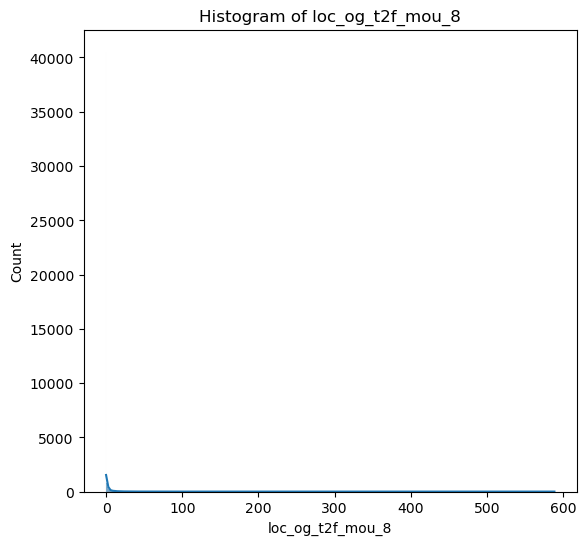


Univariate analysis for column: loc_og_t2f_mou_7
Mean: 3.7220520775700034
Median: 0.0
Variance: 177.83049765059678
Std_dev: 13.335310182016643
Min: 0.0
Max: 815.33
Skewness: 13.975422407365922
Kurtosis: 420.8194775847325


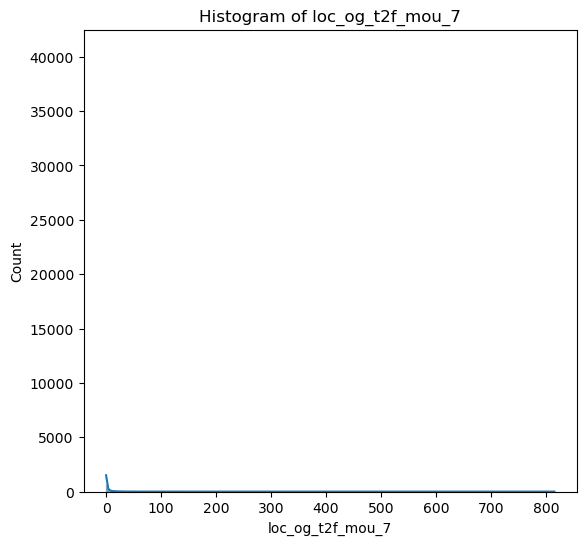


Univariate analysis for column: loc_og_t2f_mou_6
Mean: 3.6810781271823094
Median: 0.0
Variance: 171.31276070366908
Std_dev: 13.08865007186261
Min: 0.0
Max: 617.58
Skewness: 13.119955180051418
Kurtosis: 339.52114502183446


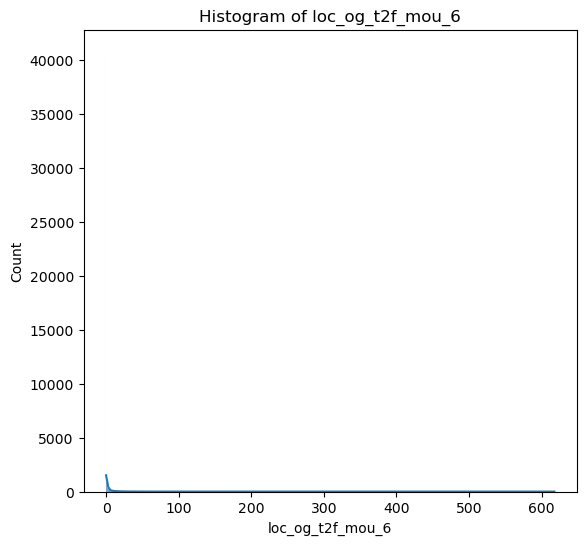


Univariate analysis for column: loc_og_t2m_mou_8
Mean: 89.36642179246994
Median: 40.38000000000001
Variance: 22455.612927986374
Std_dev: 149.85197005040132
Min: -1.4210854715202004e-14
Max: 4961.33
Skewness: 5.577503655505085
Kurtosis: 68.08213153575252


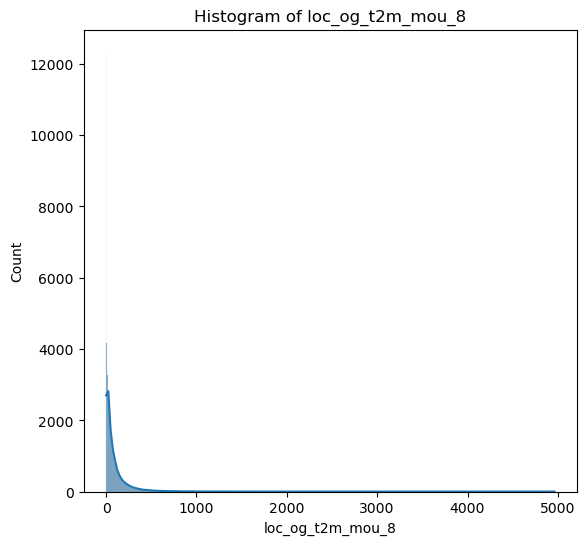


Univariate analysis for column: loc_og_t2m_mou_7
Mean: 89.46530318522191
Median: 40.09
Variance: 22964.43178706409
Std_dev: 151.54019858461348
Min: 1.4210854715202004e-14
Max: 4557.14
Skewness: 5.387138009612589
Kurtosis: 56.40579396593554


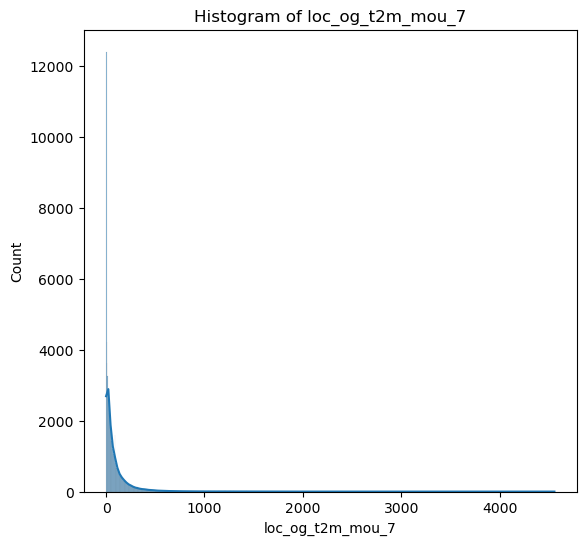


Univariate analysis for column: loc_og_t2m_mou_6
Mean: 91.85968021299196
Median: 41.18999999999999
Variance: 25387.622917453966
Std_dev: 159.33493941208866
Min: 1.4210854715202004e-14
Max: 4696.83
Skewness: 6.117273405333432
Kurtosis: 75.1011397039292


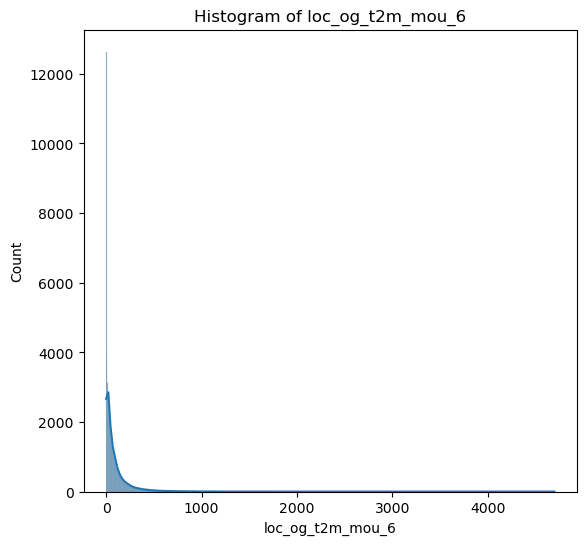


Univariate analysis for column: loc_og_t2t_mou_8
Mean: 44.685065457208275
Median: 11.89
Variance: 22516.2590613318
Std_dev: 150.05418708363922
Min: 0.0
Max: 10752.56
Skewness: 20.331266473365012
Kurtosis: 865.2700481236881


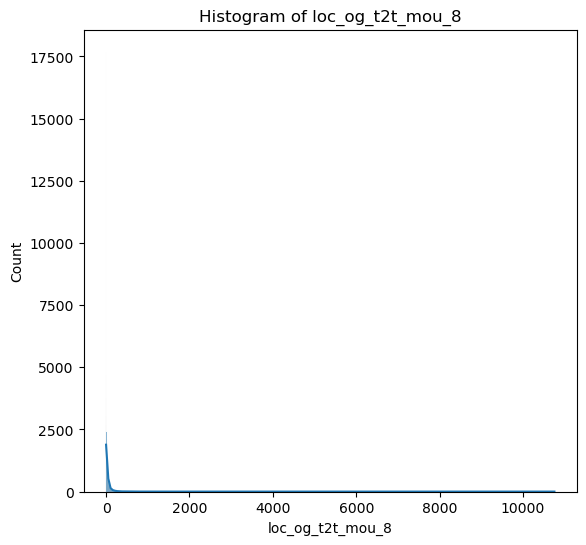


Univariate analysis for column: loc_og_t2t_mou_6
Mean: 46.11124243850528
Median: 12.089999999999996
Variance: 21957.164511226023
Std_dev: 148.1795009818363
Min: 0.0
Max: 6431.33
Skewness: 14.1727976960035
Kurtosis: 324.0798594378


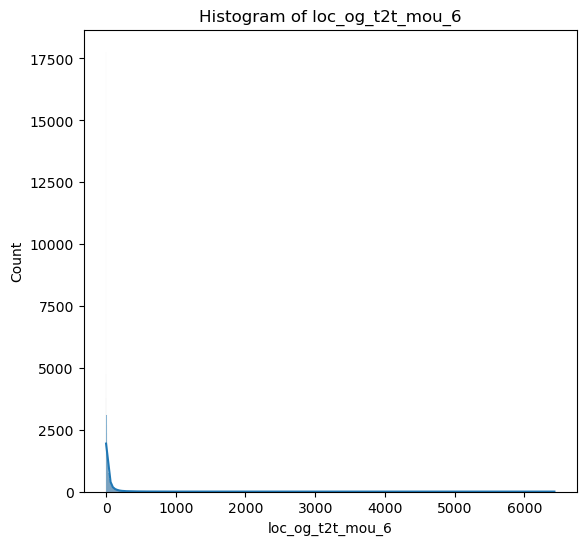


Univariate analysis for column: loc_ic_t2f_mou_8
Mean: 11.43698619549915
Median: 0.9800000000000004
Variance: 1426.1573488261167
Std_dev: 37.7644985247536
Min: 0.0
Max: 1676.58
Skewness: 12.653780112722792
Kurtosis: 310.26450922048673


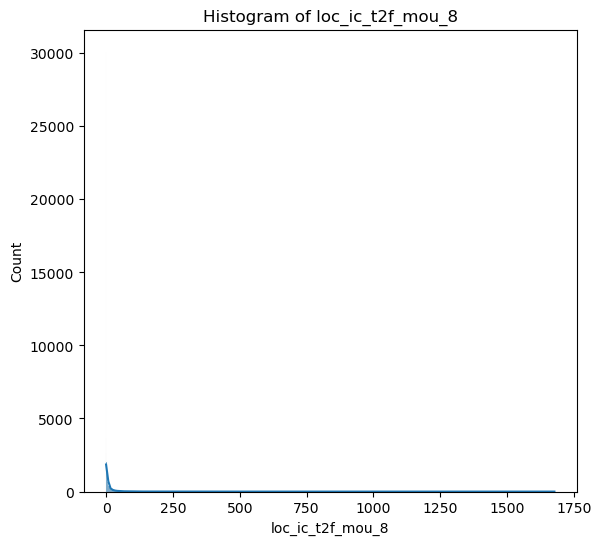


Univariate analysis for column: loc_ic_t2f_mou_7
Mean: 12.317326415367175
Median: 0.9600000000000009
Variance: 1825.363600622495
Std_dev: 42.72427413804119
Min: 1.7763568394002505e-15
Max: 1983.01
Skewness: 13.150080021454334
Kurtosis: 311.5501421685191


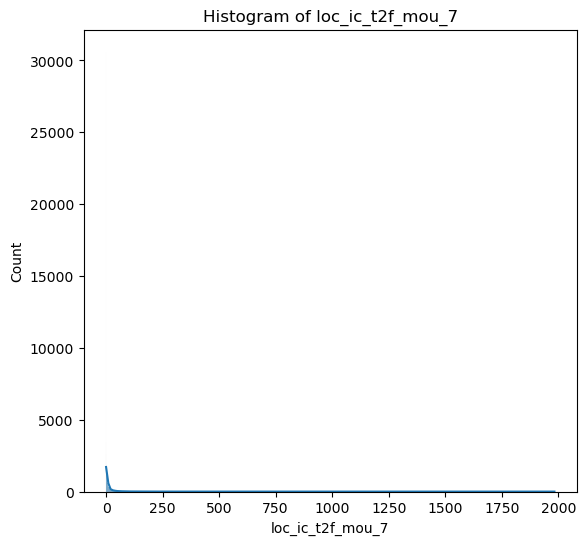


Univariate analysis for column: loc_ic_t2f_mou_6
Mean: 11.814858520981016
Median: 0.9299999999999997
Variance: 1499.42998820657
Std_dev: 38.72247394222856
Min: 0.0
Max: 1872.34
Skewness: 12.07989209220928
Kurtosis: 280.68996528525525


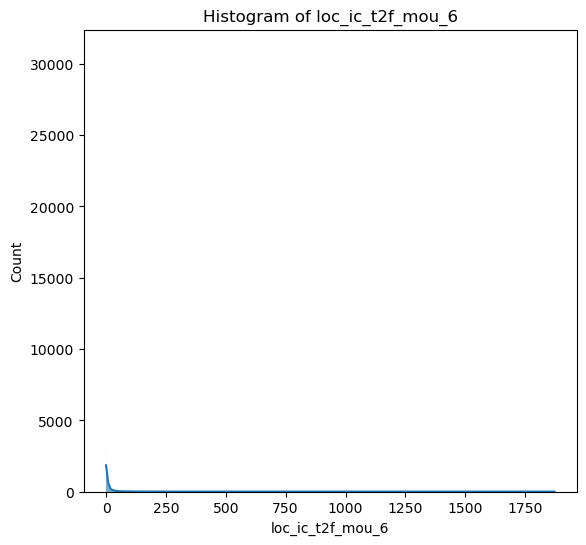


Univariate analysis for column: loc_ic_t2m_mou_8
Mean: 106.12373833621093
Median: 57.638
Variance: 26601.059024158163
Std_dev: 163.0983109175511
Min: 0.0
Max: 6274.1900000000005
Skewness: 6.509358338021456
Kurtosis: 105.42217470295152


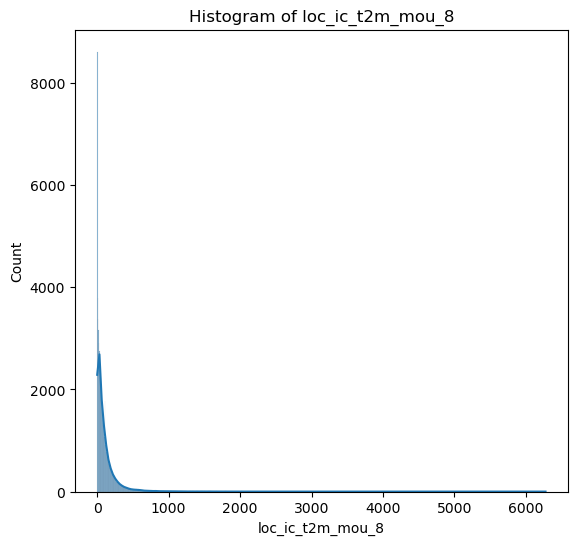


Univariate analysis for column: loc_ic_t2m_mou_7
Mean: 104.87496836605882
Median: 56.48
Variance: 26638.52434776855
Std_dev: 163.21312553764955
Min: 0.0
Max: 4455.83
Skewness: 5.954778188453001
Kurtosis: 68.80897876057334


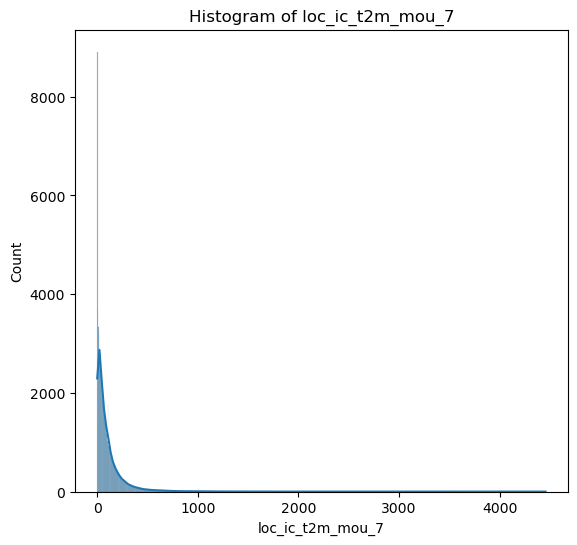


Univariate analysis for column: loc_ic_t2m_mou_6
Mean: 105.48125520404547
Median: 56.209999999999994
Variance: 27483.264084363393
Std_dev: 165.7807711538446
Min: 0.0
Max: 4450.74
Skewness: 5.9535538875375265
Kurtosis: 68.39729006764102


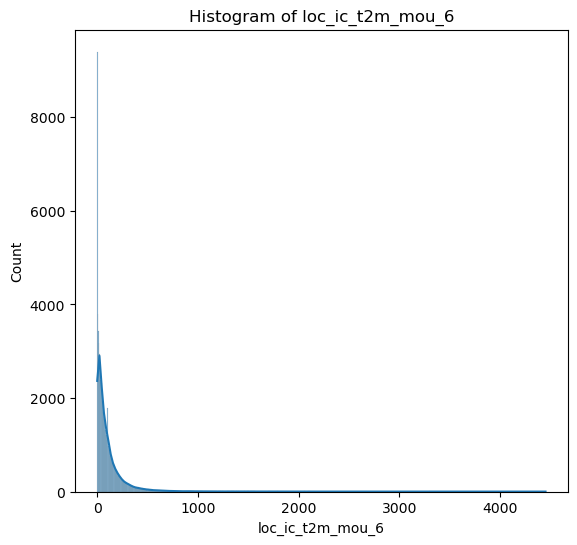


Univariate analysis for column: loc_ic_t2t_mou_8
Mean: 46.440993268106176
Median: 16.08
Variance: 19346.743068555366
Std_dev: 139.09257014145425
Min: 0.0
Max: 10696.23
Skewness: 18.83535222660797
Kurtosis: 755.7632854349248


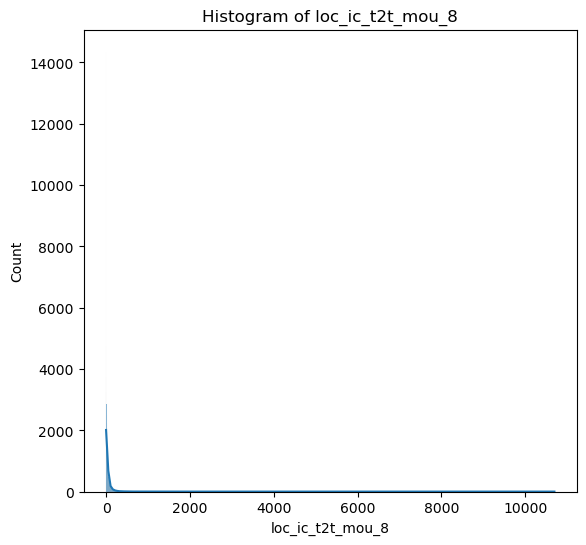


Univariate analysis for column: loc_ic_t2t_mou_7
Mean: 47.15937156477103
Median: 15.810000000000002
Variance: 21271.21518486184
Std_dev: 145.84654670187376
Min: 0.0
Max: 9324.66
Skewness: 18.295815819316918
Kurtosis: 631.8020585735782


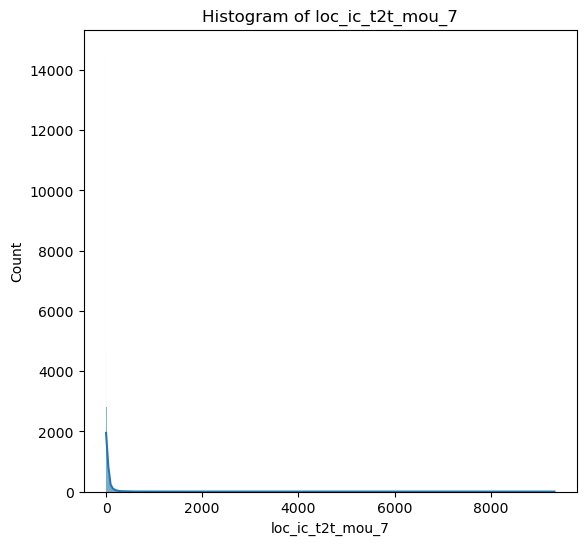


Univariate analysis for column: loc_ic_t2t_mou_6
Mean: 47.337204498108996
Median: 15.839999999999996
Variance: 19198.709290958544
Std_dev: 138.55940708215573
Min: 0.0
Max: 5315.59
Skewness: 14.103531573195367
Kurtosis: 306.6662593663858


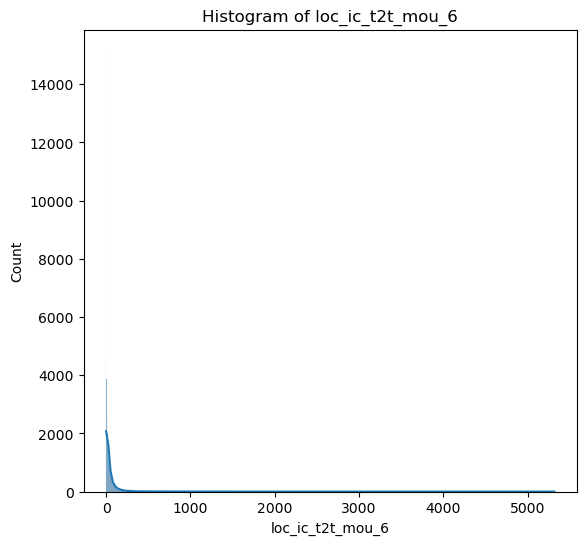

In [412]:
analysis_results = univariate_analysis(train_impute, local_call_columns)

In [414]:
std_call_columns= metadata[metadata.index.str.contains('std', case=False)].index.values

In [415]:
std_call_columns

array(['std_ic_mou_8', 'std_ic_mou_7', 'std_ic_mou_6', 'std_ic_t2f_mou_8',
       'std_ic_t2f_mou_7', 'std_ic_t2f_mou_6', 'std_ic_t2m_mou_8',
       'std_ic_t2m_mou_7', 'std_ic_t2m_mou_6', 'std_ic_t2t_mou_8',
       'std_ic_t2t_mou_7', 'std_ic_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_6', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_mou_8', 'std_og_mou_7', 'std_og_mou_6', 'std_og_t2f_mou_8',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_6', 'std_og_t2m_mou_8',
       'std_og_t2m_mou_7'], dtype=object)

In [416]:
print(train_impute[std_call_columns].dtypes)

std_ic_mou_8        float64
std_ic_mou_7        float64
std_ic_mou_6        float64
std_ic_t2f_mou_8    float64
std_ic_t2f_mou_7    float64
std_ic_t2f_mou_6    float64
std_ic_t2m_mou_8    float64
std_ic_t2m_mou_7    float64
std_ic_t2m_mou_6    float64
std_ic_t2t_mou_8    float64
std_ic_t2t_mou_7    float64
std_ic_t2t_mou_6    float64
std_og_t2t_mou_7    float64
std_og_t2t_mou_6    float64
std_og_t2t_mou_8    float64
std_og_t2m_mou_6    float64
std_og_mou_8        float64
std_og_mou_7        float64
std_og_mou_6        float64
std_og_t2f_mou_8    float64
std_og_t2f_mou_7    float64
std_og_t2f_mou_6    float64
std_og_t2m_mou_8    float64
std_og_t2m_mou_7    float64
dtype: object



Univariate analysis for column: std_ic_mou_8
Mean: 32.74252716571588
Median: 6.390000000000001
Variance: 11320.616180331344
Std_dev: 106.39838429380093
Min: 0.0
Max: 5658.74
Skewness: 14.752055843239116
Kurtosis: 391.4591234497949


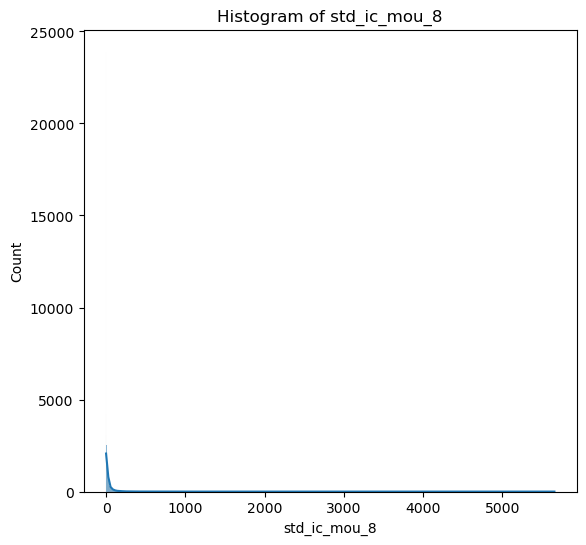


Univariate analysis for column: std_ic_mou_7
Mean: 33.554325454634075
Median: 6.359999999999999
Variance: 12768.751123953594
Std_dev: 112.9988987731898
Min: 0.0
Max: 6745.76
Skewness: 17.66991437905737
Kurtosis: 626.0407578791854


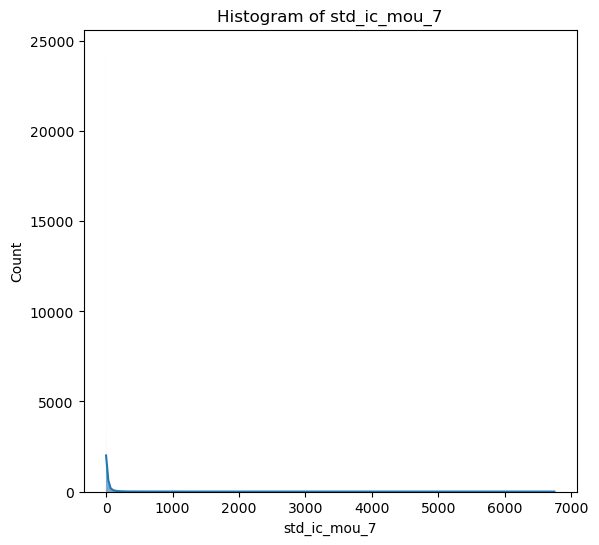


Univariate analysis for column: std_ic_mou_6
Mean: 32.19775584500246
Median: 6.43
Variance: 10568.050729782184
Std_dev: 102.80102494519295
Min: 0.0
Max: 5712.11
Skewness: 13.848509211610477
Kurtosis: 357.6275094238541


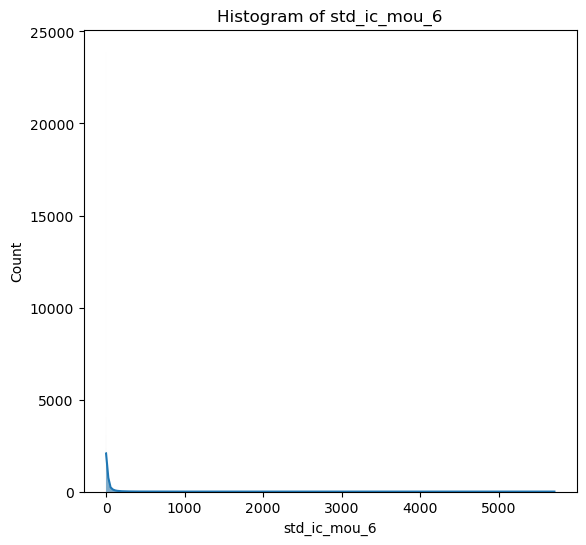


Univariate analysis for column: std_ic_t2f_mou_8
Mean: 2.0289135281859845
Median: 0.0
Variance: 240.40362345230238
Std_dev: 15.504954803297634
Min: 0.0
Max: 1394.89
Skewness: 34.086418748863274
Kurtosis: 1922.1474466759407


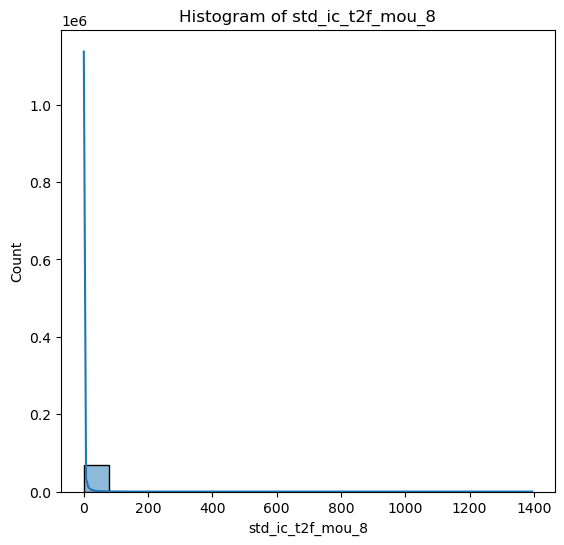


Univariate analysis for column: std_ic_t2f_mou_7
Mean: 2.1599540454452413
Median: 0.0
Variance: 252.11970569597128
Std_dev: 15.878277793765017
Min: 0.0
Max: 1136.08
Skewness: 28.629701845468627
Kurtosis: 1326.8866508541873


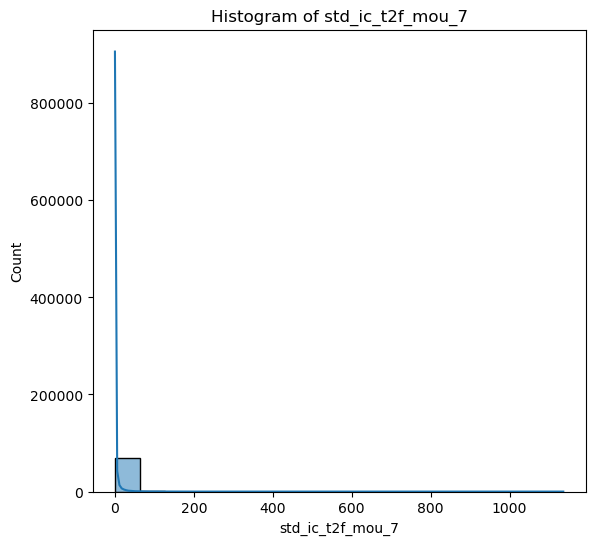


Univariate analysis for column: std_ic_t2f_mou_6
Mean: 2.10456861662385
Median: 4.440892098500626e-16
Variance: 263.04666879950645
Std_dev: 16.218713537130693
Min: 4.440892098500626e-16
Max: 1351.11
Skewness: 31.64573438301402
Kurtosis: 1631.828141240854


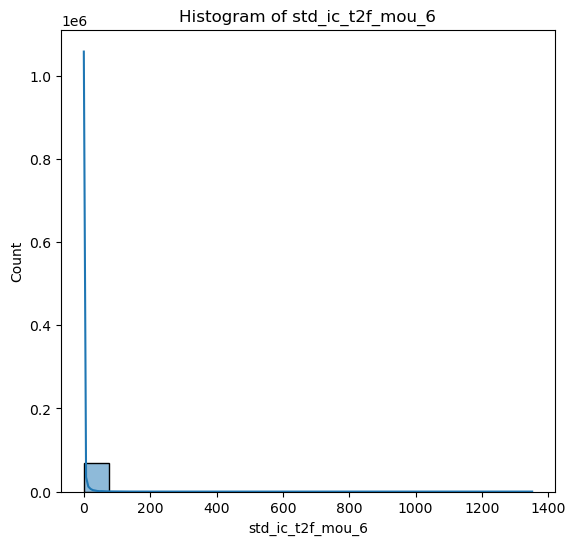


Univariate analysis for column: std_ic_t2m_mou_8
Mean: 20.88894612081488
Median: 2.3999999999999986
Variance: 6424.6102789348515
Std_dev: 80.15366665932913
Min: 0.0
Max: 5512.759999999999
Skewness: 19.21381349211359
Kurtosis: 703.3654330265312


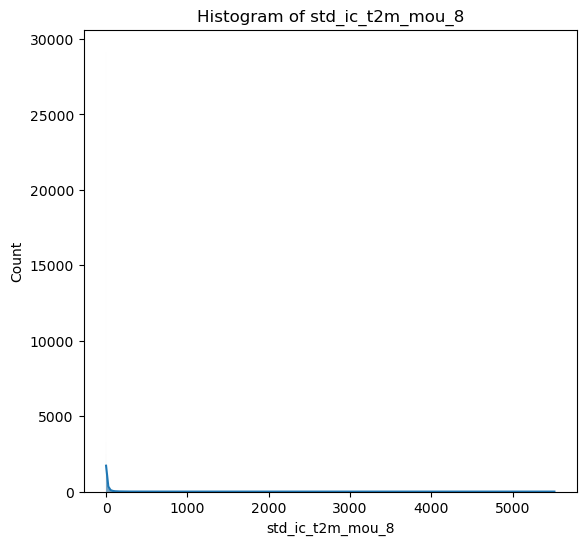


Univariate analysis for column: std_ic_t2m_mou_7
Mean: 21.58940119238282
Median: 2.3299999999999983
Variance: 7524.476282224488
Std_dev: 86.74373915288923
Min: 0.0
Max: 6141.88
Skewness: 21.92419731021162
Kurtosis: 957.051499510795


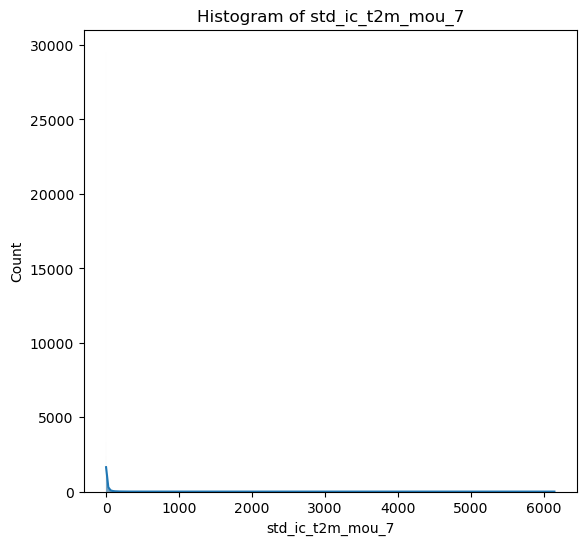


Univariate analysis for column: std_ic_t2m_mou_6
Mean: 20.65307396691107
Median: 2.379999999999999
Variance: 6240.917662678344
Std_dev: 78.99947887599224
Min: 0.0
Max: 5647.16
Skewness: 18.63381854372033
Kurtosis: 686.5120190699163


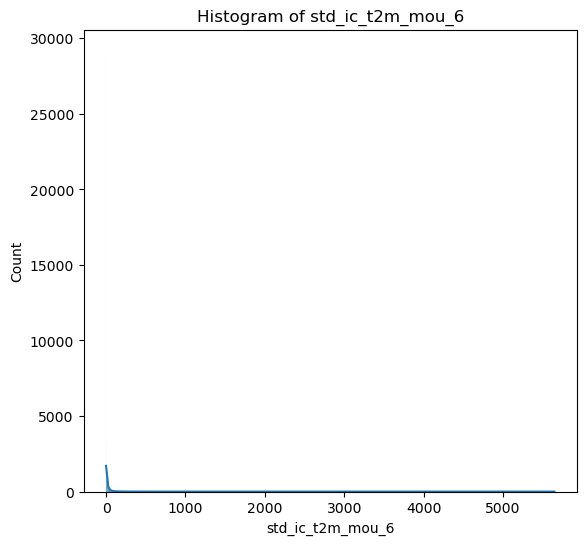


Univariate analysis for column: std_ic_t2t_mou_8
Mean: 9.822098091407168
Median: 0.0
Variance: 2812.283331360586
Std_dev: 53.030965778124255
Min: 0.0
Max: 3930.24
Skewness: 26.395096006830762
Kurtosis: 1192.6953610381213


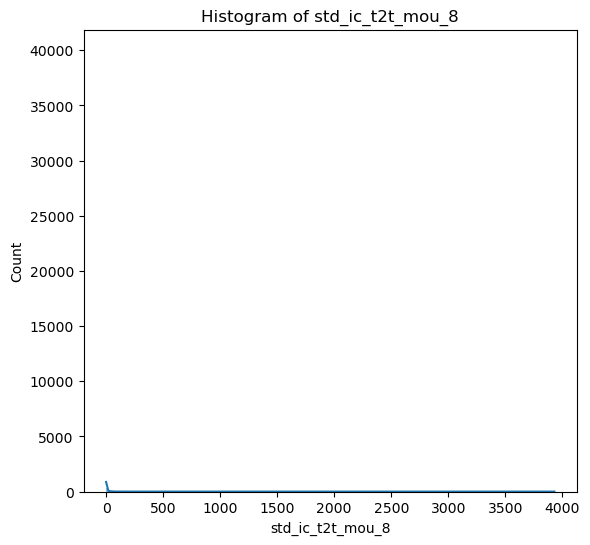


Univariate analysis for column: std_ic_t2t_mou_7
Mean: 9.802400783275646
Median: 0.0
Variance: 3046.702245881642
Std_dev: 55.196940548201056
Min: 0.0
Max: 4708.71
Skewness: 32.63435995244148
Kurtosis: 1879.6596602258164


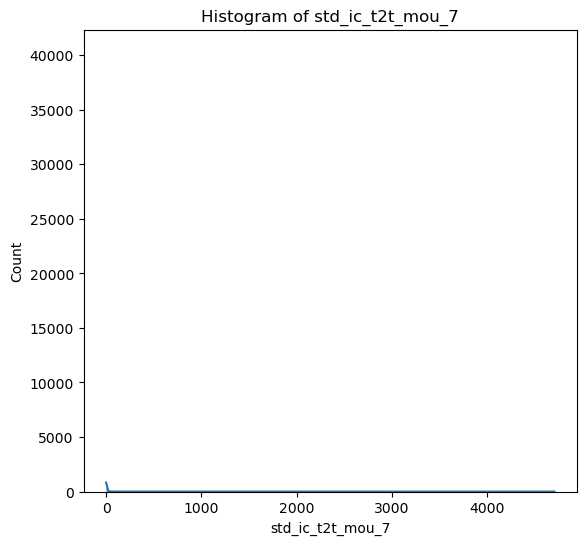


Univariate analysis for column: std_ic_t2t_mou_6
Mean: 9.43758182279848
Median: 0.0
Variance: 2592.6981217304055
Std_dev: 50.91854398674814
Min: 0.0
Max: 3336.3800000000006
Skewness: 26.128277550994355
Kurtosis: 1102.471423766086


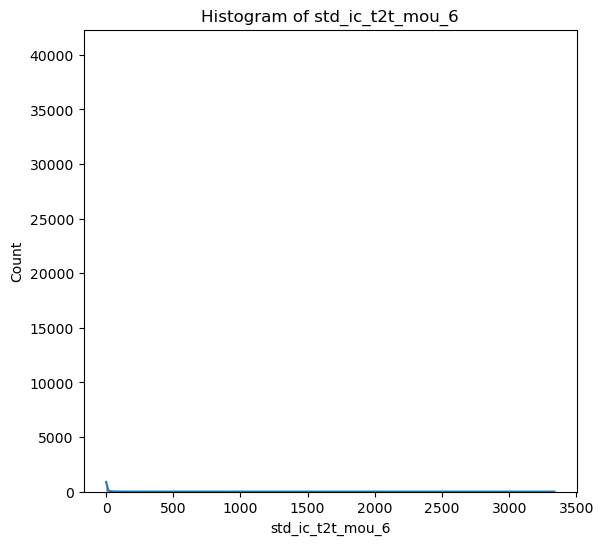


Univariate analysis for column: std_og_t2t_mou_7
Mean: 83.71887899547839
Median: 0.0
Variance: 69360.49700864767
Std_dev: 263.3638111218921
Min: 0.0
Max: 8133.66
Skewness: 7.468325358774943
Kurtosis: 100.72180815802018


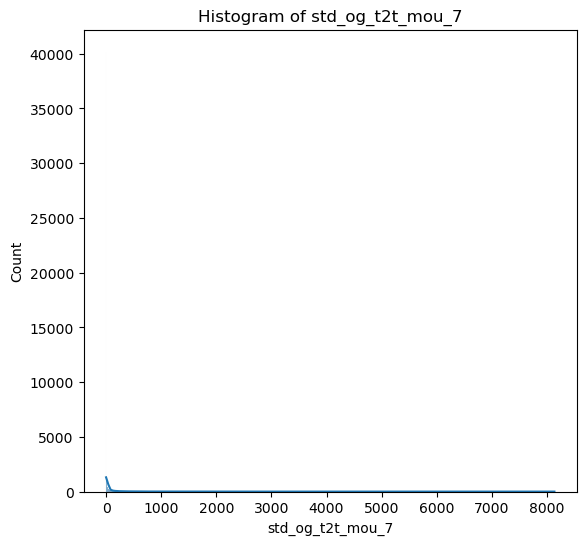


Univariate analysis for column: std_og_t2t_mou_6
Mean: 81.6966213705411
Median: 0.0
Variance: 64230.2351985004
Std_dev: 253.43684656833227
Min: 0.0
Max: 7366.58
Skewness: 7.123728421041602
Kurtosis: 87.97530248204816


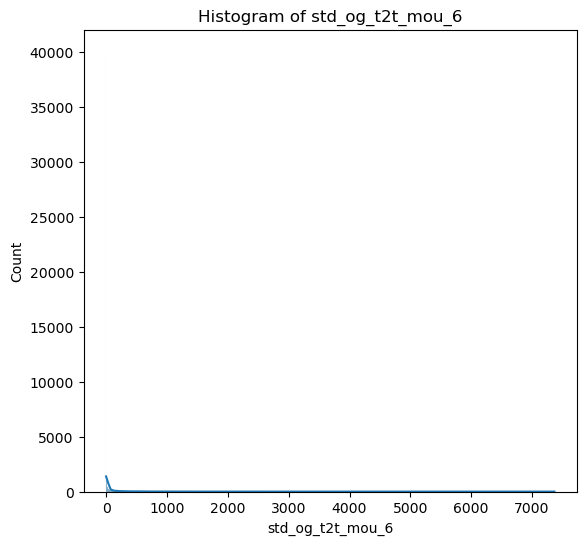


Univariate analysis for column: std_og_t2t_mou_8
Mean: 83.83359090976118
Median: 0.0
Variance: 68740.33682406337
Std_dev: 262.1837844414932
Min: 0.0
Max: 8014.43
Skewness: 7.399915294792059
Kurtosis: 97.08152555926928


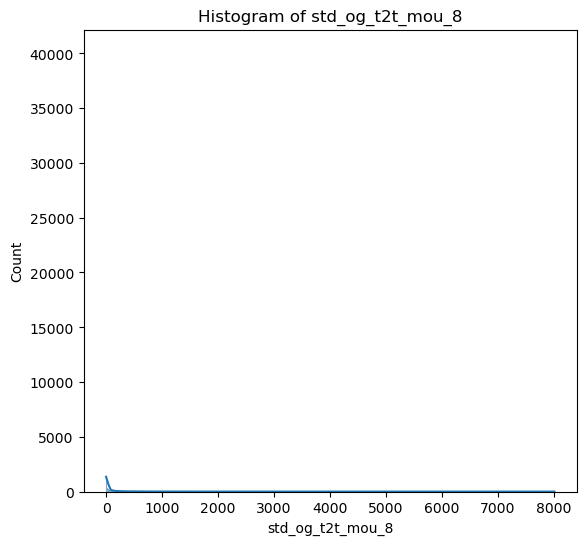


Univariate analysis for column: std_og_t2m_mou_6
Mean: 89.38928312095473
Median: 4.939999999999998
Variance: 64268.38267970406
Std_dev: 253.5120957266222
Min: 0.0
Max: 8314.76
Skewness: 6.854505643949848
Kurtosis: 78.56614842311129


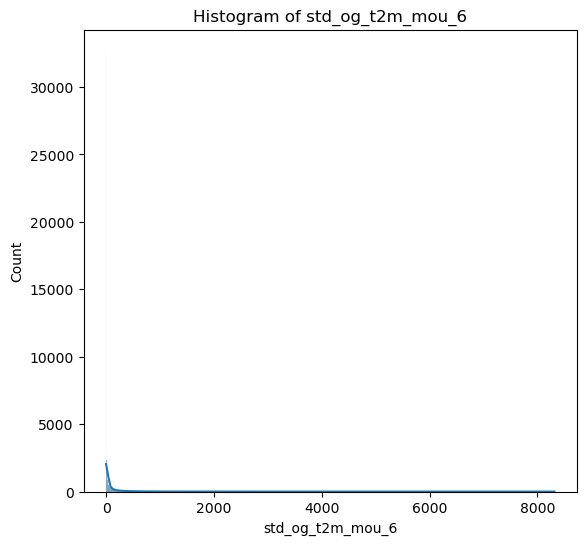


Univariate analysis for column: std_og_mou_8
Mean: 176.27024877362925
Median: 12.930000000000007
Variance: 162691.42788365987
Std_dev: 403.35025459724193
Min: -2.842170943040401e-14
Max: 13980.060000000001
Skewness: 5.403418086470994
Kurtosis: 59.059210823616745


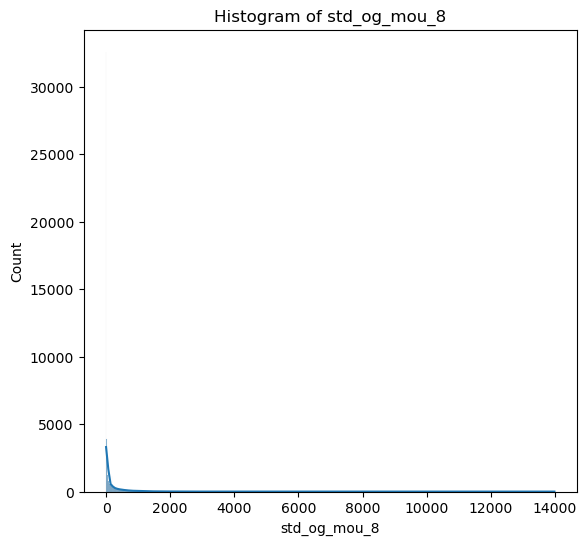


Univariate analysis for column: std_og_mou_7
Mean: 176.4138299745423
Median: 12.909999999999997
Variance: 163314.8029202303
Std_dev: 404.1222623417699
Min: 0.0
Max: 8155.53
Skewness: 4.957427003037257
Kurtosis: 40.682545648444275


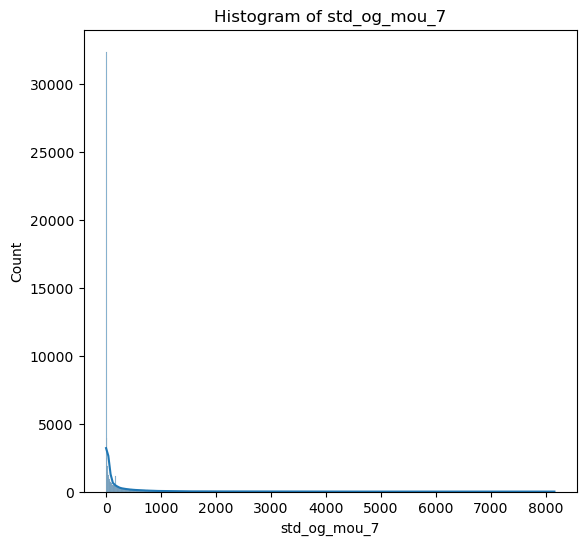


Univariate analysis for column: std_og_mou_6
Mean: 172.20193035995896
Median: 14.030000000000001
Variance: 150958.84682525054
Std_dev: 388.5342286404771
Min: 0.0
Max: 8432.99
Skewness: 4.78843007587735
Kurtosis: 37.353564066665825


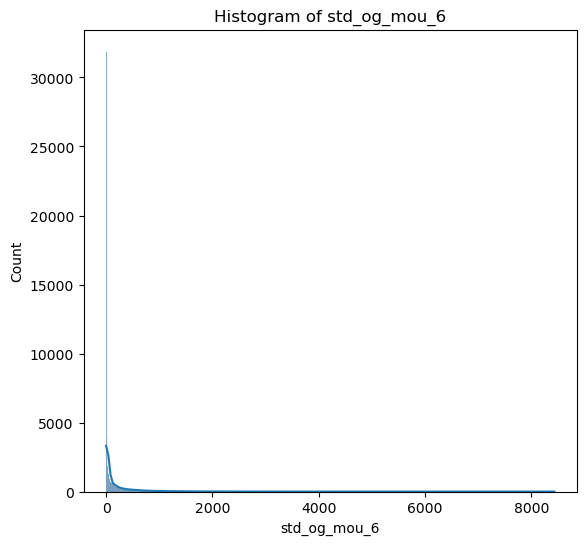


Univariate analysis for column: std_og_t2f_mou_8
Mean: 1.0337095386137434
Median: 0.0
Variance: 56.3056617119467
Std_dev: 7.503709863257421
Min: 0.0
Max: 354.16
Skewness: 19.203448128259424
Kurtosis: 541.5181902721395


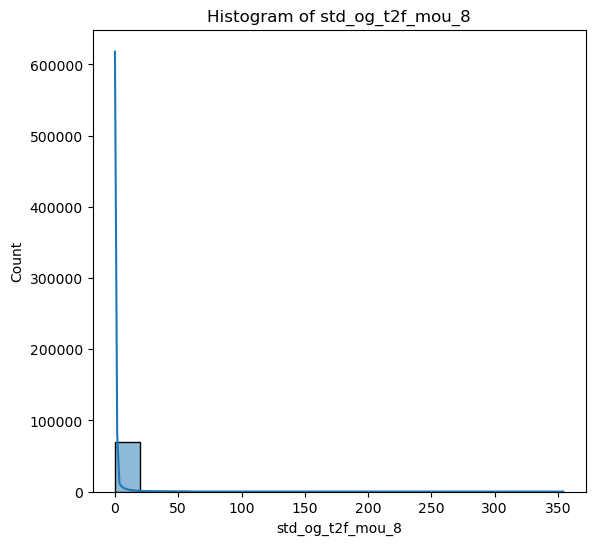


Univariate analysis for column: std_og_t2f_mou_7
Mean: 1.0721802483761924
Median: 0.0
Variance: 66.97255226898199
Std_dev: 8.183675963097635
Min: 0.0
Max: 465.78999999999996
Skewness: 23.785822285585873
Kurtosis: 883.4585721895339


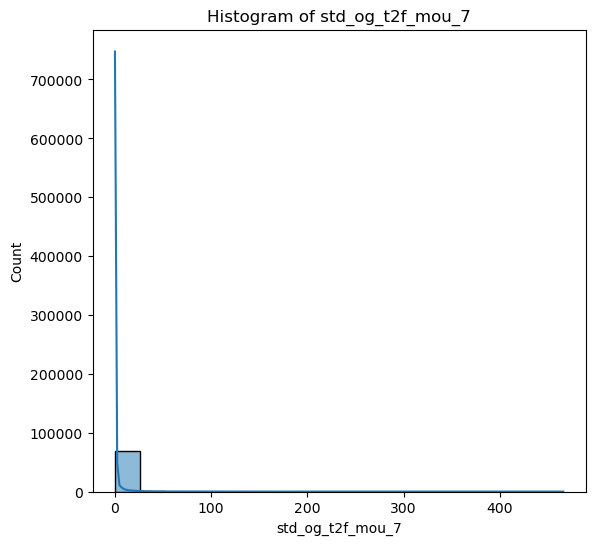


Univariate analysis for column: std_og_t2f_mou_6
Mean: 1.1132831860808008
Median: 0.0
Variance: 63.97340176643164
Std_dev: 7.998337437644879
Min: 0.0
Max: 628.56
Skewness: 23.759519538128917
Kurtosis: 1017.5582541743702


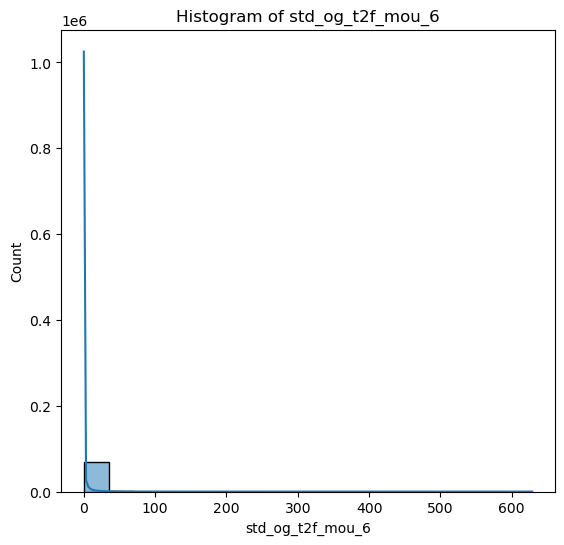


Univariate analysis for column: std_og_t2m_mou_8
Mean: 91.40030304644513
Median: 4.429999999999993
Variance: 70455.11522224988
Std_dev: 265.4338245632042
Min: 0.0
Max: 13950.04
Skewness: 8.818094610133192
Kurtosis: 187.73601103256584


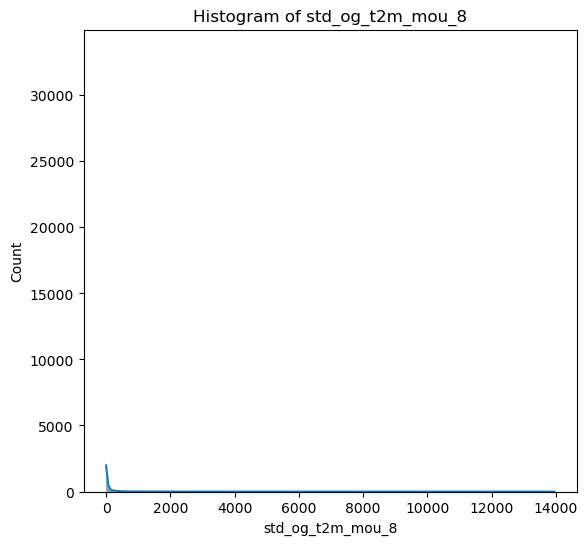


Univariate analysis for column: std_og_t2m_mou_7
Mean: 91.62008549211829
Median: 4.459999999999994
Variance: 69822.63176020059
Std_dev: 264.23972403898813
Min: 0.0
Max: 6622.54
Skewness: 6.941378770534793
Kurtosis: 76.92949149304629


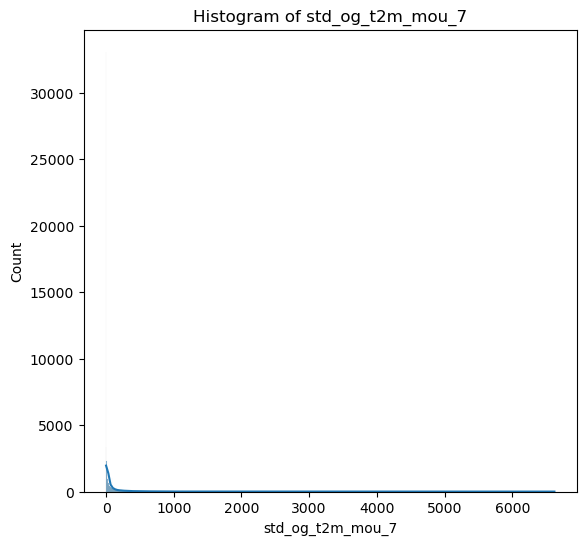

In [307]:
analysis_results = univariate_analysis(train_impute, std_call_columns)

In [308]:
isd_call_columns= metadata[metadata.index.str.contains('isd', case=False)].index.values

In [309]:
isd_call_columns

array(['isd_ic_mou_8', 'isd_ic_mou_7', 'isd_ic_mou_6', 'isd_og_mou_8',
       'isd_og_mou_7', 'isd_og_mou_6'], dtype=object)

In [310]:
print(train_impute[isd_call_columns].dtypes)

isd_ic_mou_8    float64
isd_ic_mou_7    float64
isd_ic_mou_6    float64
isd_og_mou_8    float64
isd_og_mou_7    float64
isd_og_mou_6    float64
dtype: object



Univariate analysis for column: isd_ic_mou_8
Mean: 8.37886485631982
Median: 0.0
Variance: 3846.982712301539
Std_dev: 62.02404946713443
Min: 0.0
Max: 4127.01
Skewness: 22.352814799775135
Kurtosis: 819.0405851861798


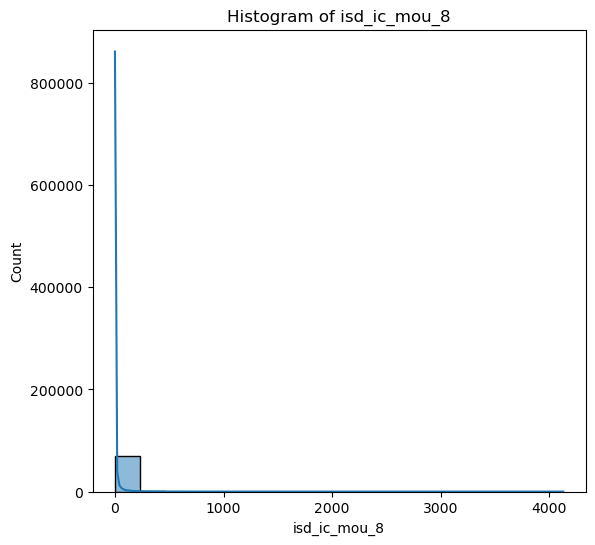


Univariate analysis for column: isd_ic_mou_7
Mean: 8.12605103640178
Median: 0.0
Variance: 3920.609316246211
Std_dev: 62.61476915429946
Min: 0.0
Max: 5289.54
Skewness: 27.465957034481185
Kurtosis: 1428.2223648127342


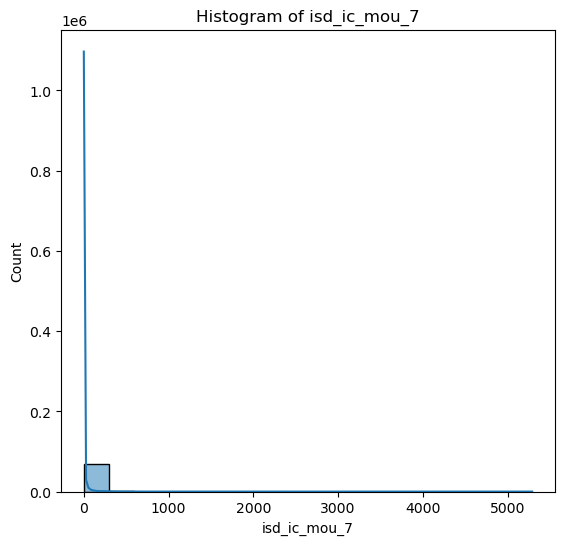


Univariate analysis for column: isd_ic_mou_6
Mean: 7.366165237438741
Median: 0.0
Variance: 3596.721359571971
Std_dev: 59.97267177283309
Min: 0.0
Max: 6789.41
Skewness: 39.38398660751338
Kurtosis: 3162.4410185030947


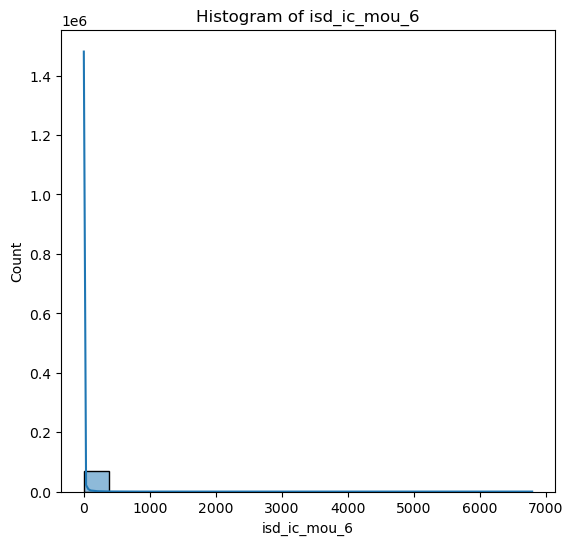


Univariate analysis for column: isd_og_mou_8
Mean: 0.8823323684709917
Median: 0.0
Variance: 842.8699297771932
Std_dev: 29.032222267287654
Min: 0.0
Max: 5681.54
Skewness: 139.92323193593572
Kurtosis: 24592.14779014359


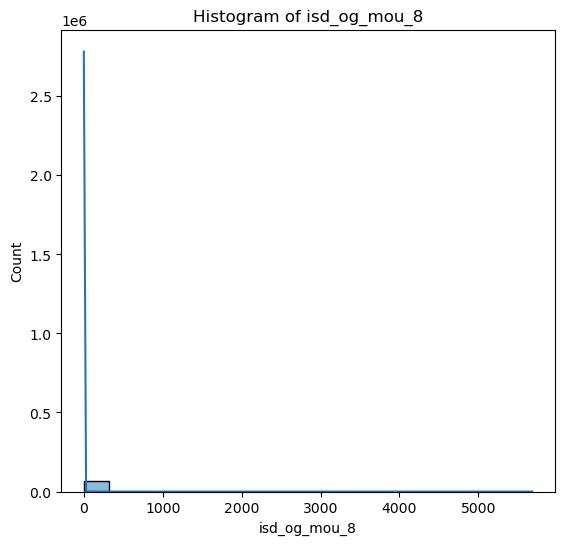


Univariate analysis for column: isd_og_mou_7
Mean: 0.8456713013919488
Median: 0.0
Variance: 835.0279199597898
Std_dev: 28.896849654586738
Min: -1.1102230246251565e-16
Max: 5490.28
Skewness: 139.01063079520088
Kurtosis: 23516.647772956076


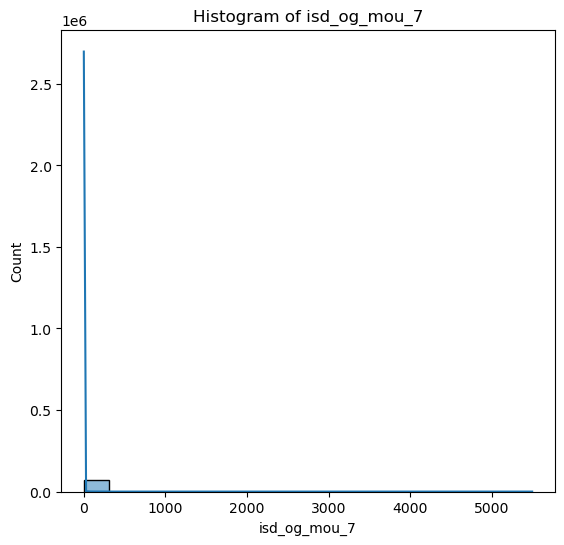


Univariate analysis for column: isd_og_mou_6
Mean: 0.86004286567079
Median: 0.0
Variance: 854.2341522760972
Std_dev: 29.227284380799002
Min: 0.0
Max: 5900.66
Skewness: 143.41808786346488
Kurtosis: 26095.78596021598


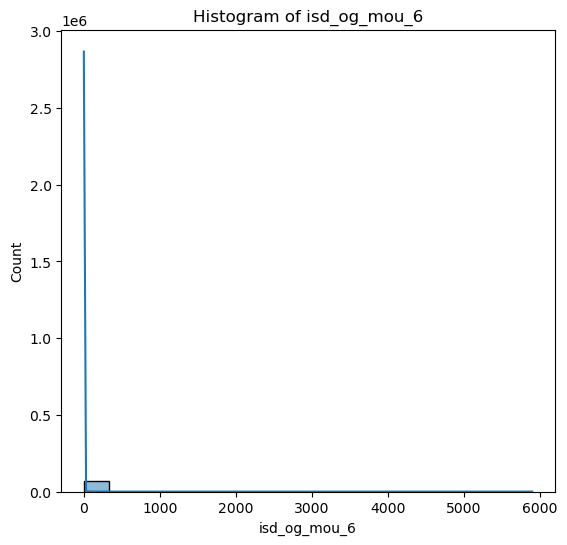

{'isd_ic_mou_8': {'mean': 8.37886485631982,
  'median': 0.0,
  'variance': 3846.982712301539,
  'std_dev': 62.02404946713443,
  'min': 0.0,
  'max': 4127.01,
  'skewness': 22.352814799775135,
  'kurtosis': 819.0405851861798},
 'isd_ic_mou_7': {'mean': 8.12605103640178,
  'median': 0.0,
  'variance': 3920.609316246211,
  'std_dev': 62.61476915429946,
  'min': 0.0,
  'max': 5289.54,
  'skewness': 27.465957034481185,
  'kurtosis': 1428.2223648127342},
 'isd_ic_mou_6': {'mean': 7.366165237438741,
  'median': 0.0,
  'variance': 3596.721359571971,
  'std_dev': 59.97267177283309,
  'min': 0.0,
  'max': 6789.41,
  'skewness': 39.38398660751338,
  'kurtosis': 3162.4410185030947},
 'isd_og_mou_8': {'mean': 0.8823323684709917,
  'median': 0.0,
  'variance': 842.8699297771932,
  'std_dev': 29.032222267287654,
  'min': 0.0,
  'max': 5681.54,
  'skewness': 139.92323193593572,
  'kurtosis': 24592.14779014359},
 'isd_og_mou_7': {'mean': 0.8456713013919488,
  'median': 0.0,
  'variance': 835.0279199597

In [311]:
 univariate_analysis(train_impute, isd_call_columns)

In [312]:
same_network_call_columns= metadata[metadata.index.str.contains('onnet', case=False)].index.values

In [313]:
same_network_call_columns

array(['onnet_mou_8', 'onnet_mou_7', 'onnet_mou_6'], dtype=object)

In [314]:
print(train_impute[same_network_call_columns].dtypes)

onnet_mou_8    float64
onnet_mou_7    float64
onnet_mou_6    float64
dtype: object



Univariate analysis for column: onnet_mou_8
Mean: 132.33320388486374
Median: 33.81
Variance: 93494.99401996942
Std_dev: 305.76951126619775
Min: 0.0
Max: 10752.56
Skewness: 7.2229480376642785
Kurtosis: 104.37253836755481


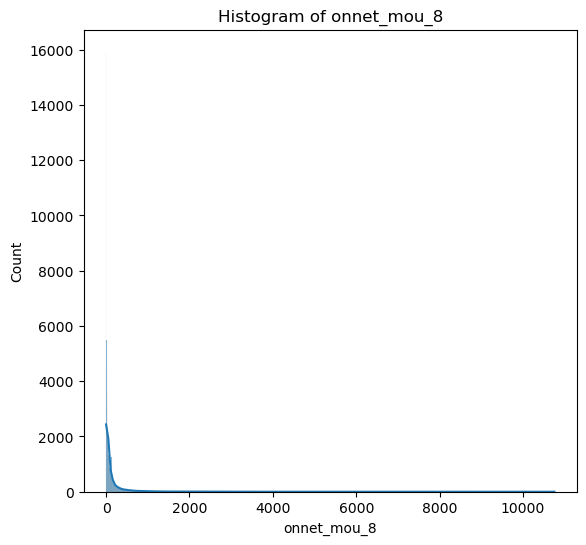


Univariate analysis for column: onnet_mou_7
Mean: 133.094498926191
Median: 33.28
Variance: 94283.84274848446
Std_dev: 307.05674190364954
Min: 0.0
Max: 8157.78
Skewness: 6.648802801341954
Kurtosis: 78.78417479005967


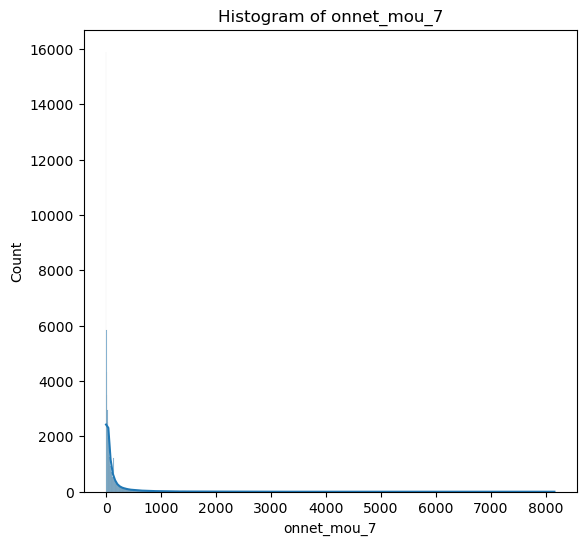


Univariate analysis for column: onnet_mou_6
Mean: 133.51697055968393
Median: 35.75999999999999
Variance: 88219.57755608119
Std_dev: 297.01780679966174
Min: 0.0
Max: 7376.71
Skewness: 6.205889681748323
Kurtosis: 65.73212384038278


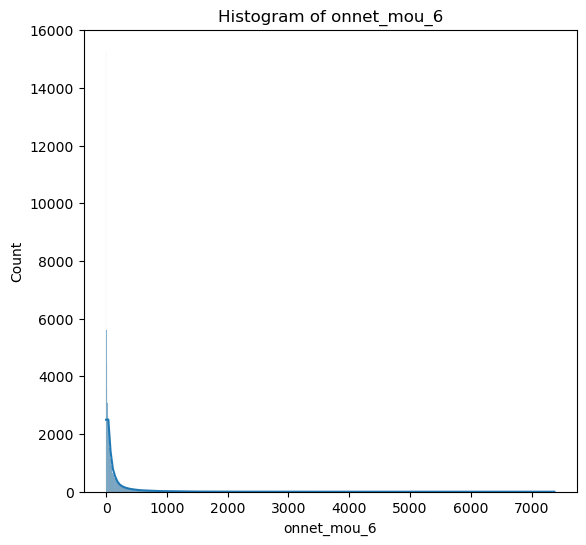

{'onnet_mou_8': {'mean': 132.33320388486374,
  'median': 33.81,
  'variance': 93494.99401996942,
  'std_dev': 305.76951126619775,
  'min': 0.0,
  'max': 10752.56,
  'skewness': 7.2229480376642785,
  'kurtosis': 104.37253836755481},
 'onnet_mou_7': {'mean': 133.094498926191,
  'median': 33.28,
  'variance': 94283.84274848446,
  'std_dev': 307.05674190364954,
  'min': 0.0,
  'max': 8157.78,
  'skewness': 6.648802801341954,
  'kurtosis': 78.78417479005967},
 'onnet_mou_6': {'mean': 133.51697055968393,
  'median': 35.75999999999999,
  'variance': 88219.57755608119,
  'std_dev': 297.01780679966174,
  'min': 0.0,
  'max': 7376.71,
  'skewness': 6.205889681748323,
  'kurtosis': 65.73212384038278}}

In [315]:
 univariate_analysis(train_impute, same_network_call_columns)

In [ ]:
# Other Network

In [113]:
other_network_call_columns= metadata[metadata.index.str.contains('offnet', case=False)].index.values

In [114]:
other_network_call_columns

array(['offnet_mou_8', 'offnet_mou_7', 'offnet_mou_6'], dtype=object)

In [115]:
print(train_impute[other_network_call_columns].dtypes)

offnet_mou_8    float64
offnet_mou_7    float64
offnet_mou_6    float64
dtype: object



Univariate analysis for column: offnet_mou_8
Mean: 195.5670359149979
Median: 94.98
Variance: 101114.33316720942
Std_dev: 317.9848002141131
Min: 0.0
Max: 14007.34
Skewness: 6.242523238573962
Kurtosis: 100.66463494004064


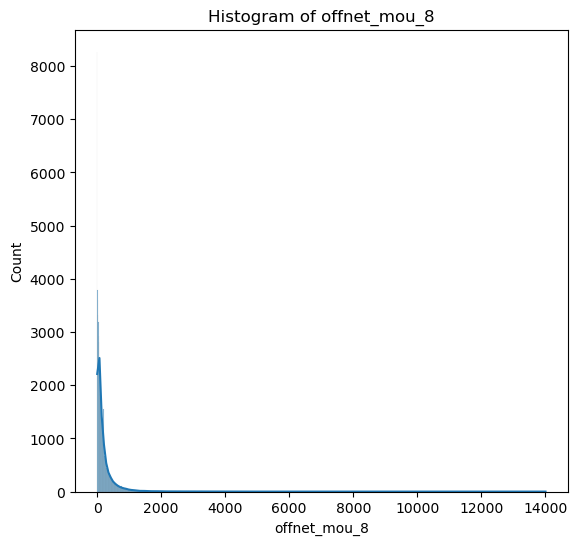


Univariate analysis for column: offnet_mou_7
Mean: 195.91096921728666
Median: 93.39
Variance: 101269.95957468562
Std_dev: 318.2294134342167
Min: 0.0
Max: 7043.98
Skewness: 5.101116748375556
Kurtosis: 45.85404269565677


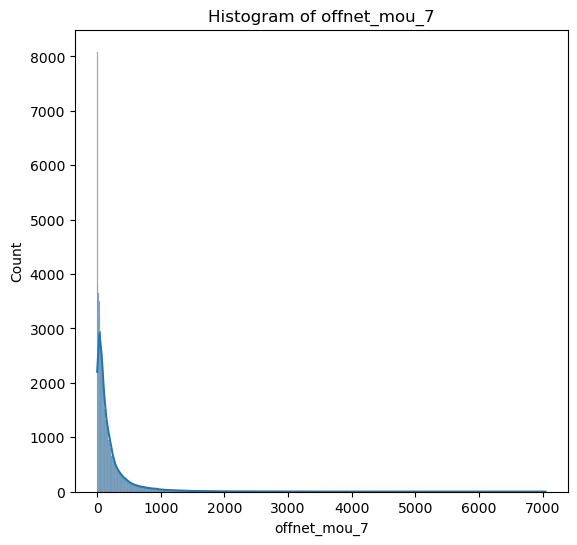


Univariate analysis for column: offnet_mou_6
Mean: 198.71380082701037
Median: 99.16
Variance: 97934.30978784486
Std_dev: 312.94457941917585
Min: 0.0
Max: 8362.36
Skewness: 4.962390791431231
Kurtosis: 44.51638074527398


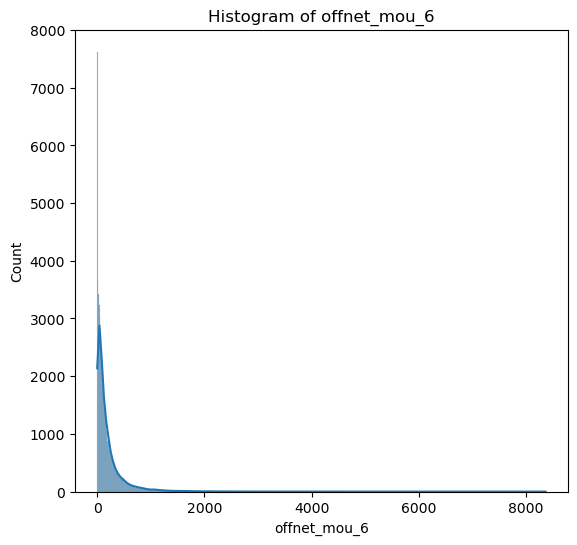

{'offnet_mou_8': {'mean': 195.5670359149979,
  'median': 94.98,
  'variance': 101114.33316720942,
  'std_dev': 317.9848002141131,
  'min': 0.0,
  'max': 14007.34,
  'skewness': 6.242523238573962,
  'kurtosis': 100.66463494004064},
 'offnet_mou_7': {'mean': 195.91096921728666,
  'median': 93.39,
  'variance': 101269.95957468562,
  'std_dev': 318.2294134342167,
  'min': 0.0,
  'max': 7043.98,
  'skewness': 5.101116748375556,
  'kurtosis': 45.85404269565677},
 'offnet_mou_6': {'mean': 198.71380082701037,
  'median': 99.16,
  'variance': 97934.30978784486,
  'std_dev': 312.94457941917585,
  'min': 0.0,
  'max': 8362.36,
  'skewness': 4.962390791431231,
  'kurtosis': 44.51638074527398}}

In [116]:
univariate_analysis(train_impute, other_network_call_columns)

In [ ]:
# Roaming Calls 

In [117]:
roam_network_call_columns= metadata[metadata.index.str.contains('roam', case=False)].index.values

In [118]:
roam_network_call_columns

array(['roam_og_mou_8', 'roam_og_mou_7', 'roam_og_mou_6', 'roam_ic_mou_8',
       'roam_ic_mou_7', 'roam_ic_mou_6'], dtype=object)

In [119]:
print(train_impute[roam_network_call_columns].dtypes)

roam_og_mou_8    float64
roam_og_mou_7    float64
roam_og_mou_6    float64
roam_ic_mou_8    float64
roam_ic_mou_7    float64
roam_ic_mou_6    float64
dtype: object



Univariate analysis for column: roam_og_mou_8
Mean: 9.79286286321786
Median: 0.0
Variance: 3992.479181744894
Std_dev: 63.18606794021048
Min: 0.0
Max: 5337.04
Skewness: 24.083563065753562
Kurtosis: 1169.4938422452674


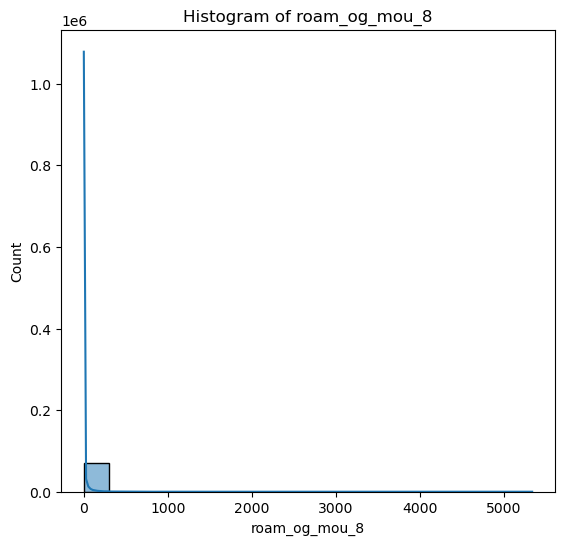


Univariate analysis for column: roam_og_mou_7
Mean: 9.934227526946435
Median: 0.0
Variance: 3327.3136368037935
Std_dev: 57.68287126005252
Min: 0.0
Max: 2812.04
Skewness: 14.374192652304346
Kurtosis: 318.0119897446984


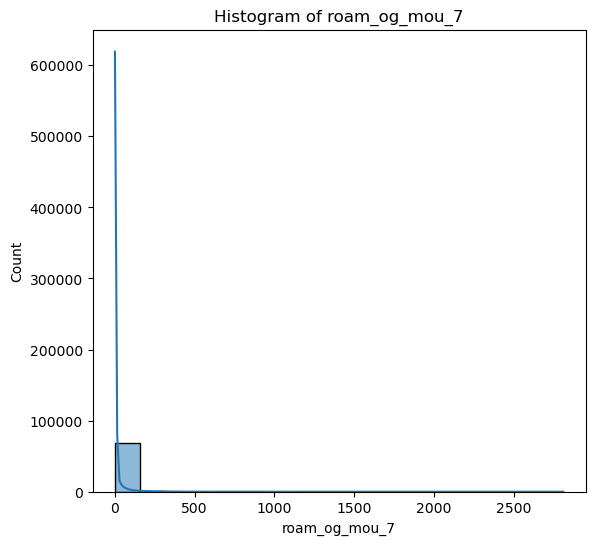


Univariate analysis for column: roam_og_mou_6
Mean: 14.301312884828333
Median: 0.0
Variance: 5243.369275451261
Std_dev: 72.41111292785978
Min: 0.0
Max: 3775.11
Skewness: 14.167147440569183
Kurtosis: 348.8986932863593


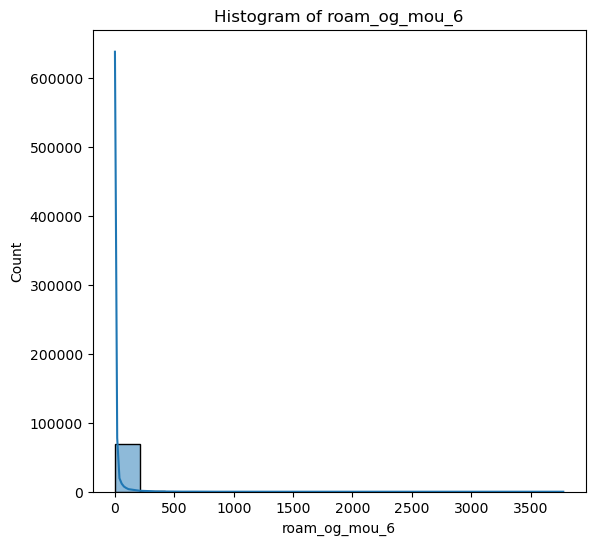


Univariate analysis for column: roam_ic_mou_8
Mean: 6.978942729690911
Median: 0.0
Variance: 2737.4863292720515
Std_dev: 52.32099319844809
Min: 0.0
Max: 4169.81
Skewness: 26.06960733314319
Kurtosis: 1197.855449409206


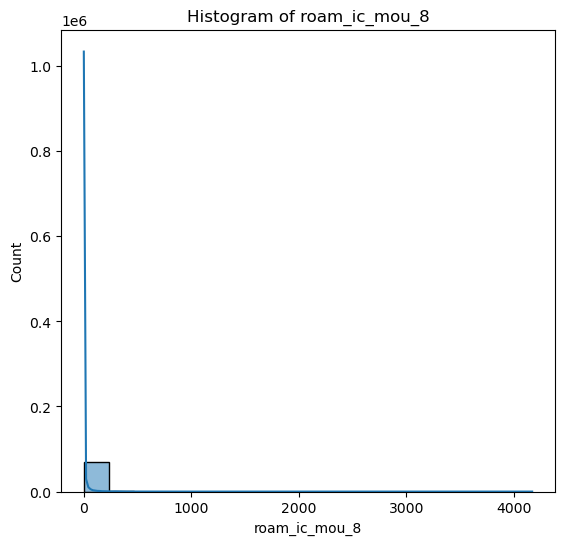


Univariate analysis for column: roam_ic_mou_7
Mean: 7.023836148092209
Median: 0.0
Variance: 3036.0569420883335
Std_dev: 55.1004259701169
Min: 0.0
Max: 4155.83
Skewness: 27.624475315717476
Kurtosis: 1303.9709795799365


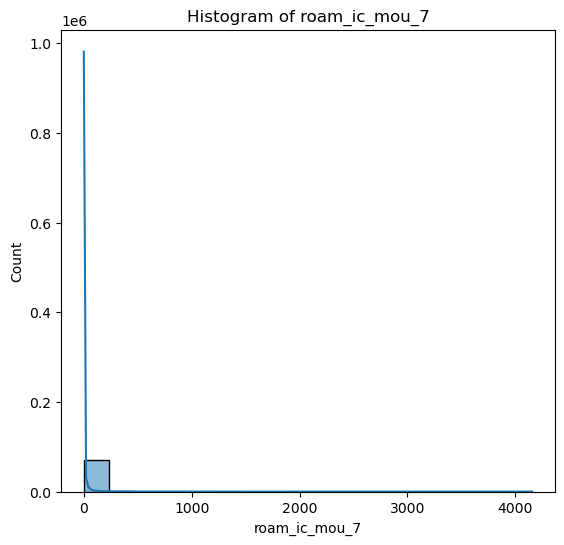


Univariate analysis for column: roam_ic_mou_6
Mean: 9.735484361737702
Median: 0.0
Variance: 3187.2114499284457
Std_dev: 56.455393452959356
Min: 0.0
Max: 2850.98
Skewness: 17.02898169276087
Kurtosis: 488.44695333678646


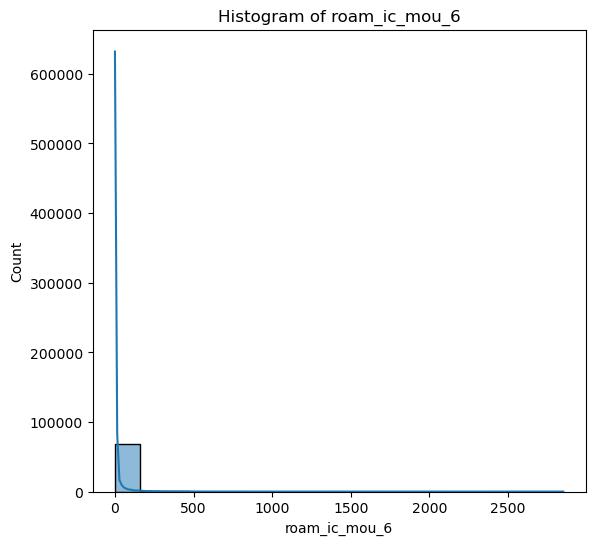

{'roam_og_mou_8': {'mean': 9.79286286321786,
  'median': 0.0,
  'variance': 3992.479181744894,
  'std_dev': 63.18606794021048,
  'min': 0.0,
  'max': 5337.04,
  'skewness': 24.083563065753562,
  'kurtosis': 1169.4938422452674},
 'roam_og_mou_7': {'mean': 9.934227526946435,
  'median': 0.0,
  'variance': 3327.3136368037935,
  'std_dev': 57.68287126005252,
  'min': 0.0,
  'max': 2812.04,
  'skewness': 14.374192652304346,
  'kurtosis': 318.0119897446984},
 'roam_og_mou_6': {'mean': 14.301312884828333,
  'median': 0.0,
  'variance': 5243.369275451261,
  'std_dev': 72.41111292785978,
  'min': 0.0,
  'max': 3775.11,
  'skewness': 14.167147440569183,
  'kurtosis': 348.8986932863593},
 'roam_ic_mou_8': {'mean': 6.978942729690911,
  'median': 0.0,
  'variance': 2737.4863292720515,
  'std_dev': 52.32099319844809,
  'min': 0.0,
  'max': 4169.81,
  'skewness': 26.06960733314319,
  'kurtosis': 1197.855449409206},
 'roam_ic_mou_7': {'mean': 7.023836148092209,
  'median': 0.0,
  'variance': 3036.0569

In [120]:
univariate_analysis(train_impute, roam_network_call_columns)

# Special Call 

In [316]:
spl_network_call_columns= metadata[metadata.index.str.contains('spl', case=False)].index.values

In [317]:
spl_network_call_columns

array(['spl_ic_mou_6', 'spl_ic_mou_8', 'spl_ic_mou_7', 'spl_og_mou_8',
       'spl_og_mou_7', 'spl_og_mou_6'], dtype=object)

In [318]:
print(train_impute[spl_network_call_columns].dtypes)

spl_ic_mou_6    float64
spl_ic_mou_8    float64
spl_ic_mou_7    float64
spl_og_mou_8    float64
spl_og_mou_7    float64
spl_og_mou_6    float64
dtype: object



Univariate analysis for column: spl_ic_mou_6
Mean: 0.061382451566688256
Median: 0.0
Variance: 0.026214097721287445
Std_dev: 0.16190768271236372
Min: 0.0
Max: 19.76
Skewness: 27.81003172486308
Kurtosis: 3137.303426960263


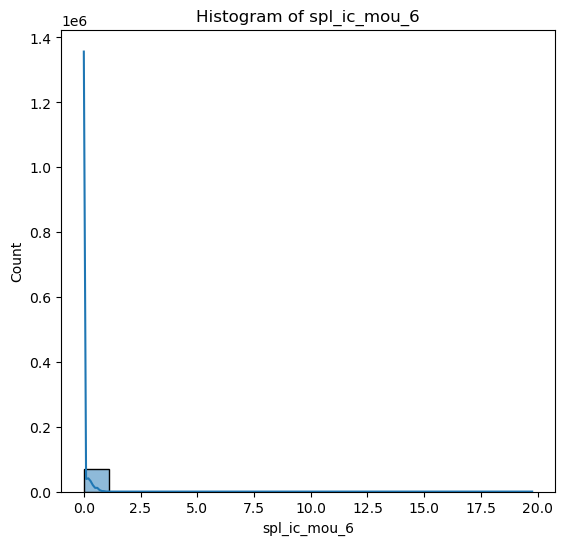


Univariate analysis for column: spl_ic_mou_8
Mean: 0.04144406085078569
Median: 0.0
Variance: 0.021135892432500438
Std_dev: 0.14538188481547637
Min: 0.0
Max: 16.86
Skewness: 25.758618441718102
Kurtosis: 2600.6309386706935


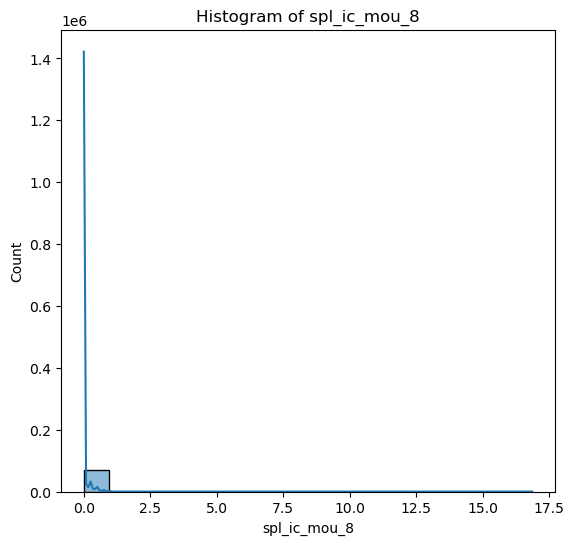


Univariate analysis for column: spl_ic_mou_7
Mean: 0.033206372865668264
Median: 0.0
Variance: 0.01822472693294771
Std_dev: 0.13499898863675872
Min: -6.938893903907228e-18
Max: 13.46
Skewness: 21.46904716317505
Kurtosis: 1601.8626368645434


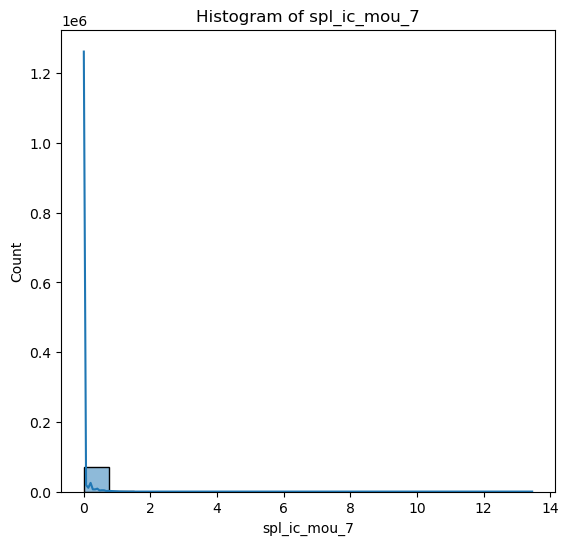


Univariate analysis for column: spl_og_mou_8
Mean: 5.049750434931398
Median: 0.09999999999999964
Variance: 300.15101601859453
Std_dev: 17.324866984152997
Min: 8.881784197001252e-16
Max: 1075.08
Skewness: 18.983626949497907
Kurtosis: 701.9516005260789


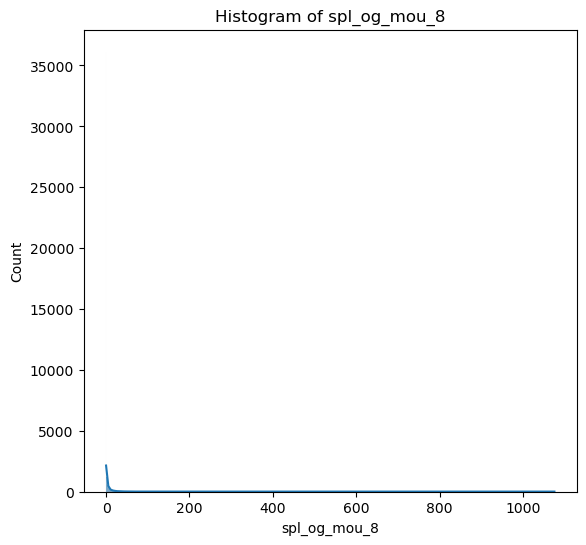


Univariate analysis for column: spl_og_mou_7
Mean: 4.959885880793577
Median: 0.0
Variance: 477.66056006175796
Std_dev: 21.85544691974424
Min: 0.0
Max: 2372.51
Skewness: 43.26019340365276
Kurtosis: 3454.4523163430263


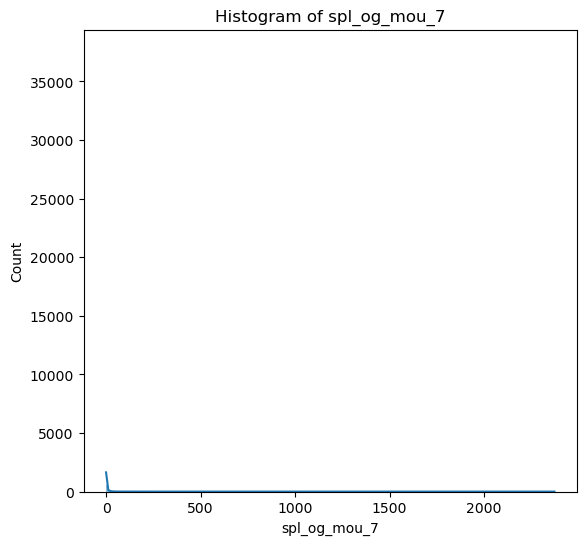


Univariate analysis for column: spl_og_mou_6
Mean: 3.968475282072192
Median: 0.0
Variance: 243.1123691802063
Std_dev: 15.59206109467912
Min: 0.0
Max: 1023.21
Skewness: 25.35269565311597
Kurtosis: 1170.4774950071467


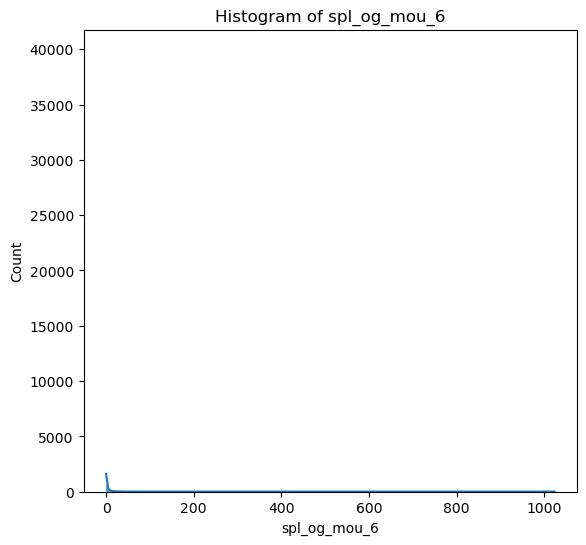

{'spl_ic_mou_6': {'mean': 0.061382451566688256,
  'median': 0.0,
  'variance': 0.026214097721287445,
  'std_dev': 0.16190768271236372,
  'min': 0.0,
  'max': 19.76,
  'skewness': 27.81003172486308,
  'kurtosis': 3137.303426960263},
 'spl_ic_mou_8': {'mean': 0.04144406085078569,
  'median': 0.0,
  'variance': 0.021135892432500438,
  'std_dev': 0.14538188481547637,
  'min': 0.0,
  'max': 16.86,
  'skewness': 25.758618441718102,
  'kurtosis': 2600.6309386706935},
 'spl_ic_mou_7': {'mean': 0.033206372865668264,
  'median': 0.0,
  'variance': 0.01822472693294771,
  'std_dev': 0.13499898863675872,
  'min': -6.938893903907228e-18,
  'max': 13.46,
  'skewness': 21.46904716317505,
  'kurtosis': 1601.8626368645434},
 'spl_og_mou_8': {'mean': 5.049750434931398,
  'median': 0.09999999999999964,
  'variance': 300.15101601859453,
  'std_dev': 17.324866984152997,
  'min': 8.881784197001252e-16,
  'max': 1075.08,
  'skewness': 18.983626949497907,
  'kurtosis': 701.9516005260789},
 'spl_og_mou_7': {'me

In [319]:
univariate_analysis(train_impute, spl_network_call_columns)

# REVENUE AND USAGE

In [320]:
avg_revenue_columns= metadata[metadata.index.str.contains('arpu', case=False)].index.values

In [321]:
avg_revenue_columns

array(['arpu_6', 'arpu_7', 'arpu_8'], dtype=object)

In [322]:
print(train_impute[avg_revenue_columns].dtypes)

arpu_6    float64
arpu_7    float64
arpu_8    float64
dtype: object



Univariate analysis for column: arpu_6
Mean: 283.13436489092703
Median: 197.484
Variance: 111698.94267108131
Std_dev: 334.2139175304962
Min: -2258.709
Max: 27731.088
Skewness: 13.700342827550731
Kurtosis: 789.5571479927354


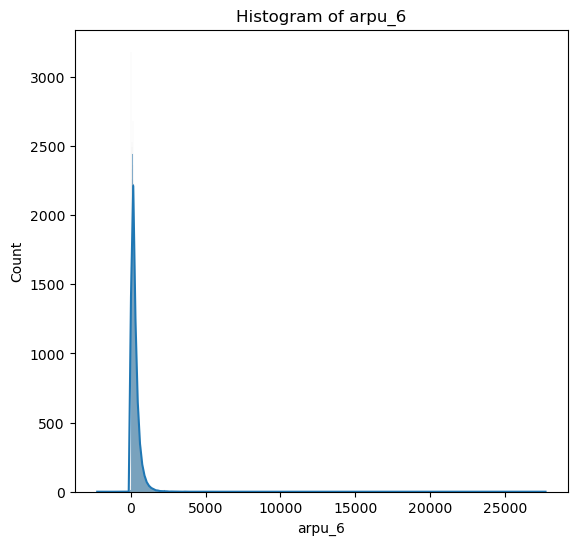


Univariate analysis for column: arpu_7
Mean: 278.18591179874
Median: 191.588
Variance: 118588.58053820526
Std_dev: 344.3669271840797
Min: -1289.715
Max: 35145.834
Skewness: 20.271332375021498
Kurtosis: 1644.999255043742


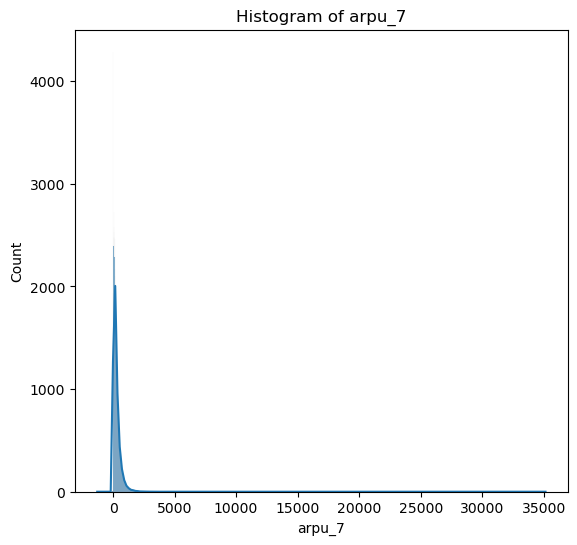


Univariate analysis for column: arpu_8
Mean: 278.8588264260918
Median: 192.234
Variance: 123850.72330968827
Std_dev: 351.9243147463504
Min: -945.808
Max: 33543.624
Skewness: 19.045774106299618
Kurtosis: 1367.0892811541921


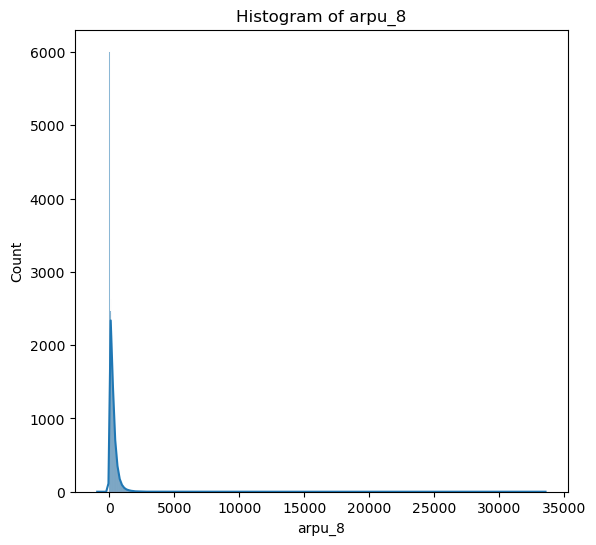

{'arpu_6': {'mean': 283.13436489092703,
  'median': 197.484,
  'variance': 111698.94267108131,
  'std_dev': 334.2139175304962,
  'min': -2258.709,
  'max': 27731.088,
  'skewness': 13.700342827550731,
  'kurtosis': 789.5571479927354},
 'arpu_7': {'mean': 278.18591179874,
  'median': 191.588,
  'variance': 118588.58053820526,
  'std_dev': 344.3669271840797,
  'min': -1289.715,
  'max': 35145.834,
  'skewness': 20.271332375021498,
  'kurtosis': 1644.999255043742},
 'arpu_8': {'mean': 278.8588264260918,
  'median': 192.234,
  'variance': 123850.72330968827,
  'std_dev': 351.9243147463504,
  'min': -945.808,
  'max': 33543.624,
  'skewness': 19.045774106299618,
  'kurtosis': 1367.0892811541921}}

In [323]:
univariate_analysis(train_impute, avg_revenue_columns)

In [ ]:
# Volume of Usages

In [324]:
vol_usage_columns= metadata[metadata.index.str.contains('vol', case=False)].index.values

In [325]:
vol_usage_columns

array(['vol_3g_mb_8', 'vol_3g_mb_7', 'vol_3g_mb_6', 'vol_2g_mb_8',
       'vol_2g_mb_7', 'vol_2g_mb_6'], dtype=object)

In [138]:
print(train_impute[vol_usage_columns].dtypes)

vol_3g_mb_8    float64
vol_3g_mb_7    float64
vol_3g_mb_6    float64
vol_2g_mb_8    float64
vol_2g_mb_7    float64
vol_2g_mb_6    float64
dtype: object



Univariate analysis for column: vol_3g_mb_8
Mean: 135.486540950585
Median: 0.0
Variance: 322976.5218900441
Std_dev: 568.3102338424359
Min: 0.0
Max: 30036.06
Skewness: 13.911735392464298
Kurtosis: 434.74169918605816


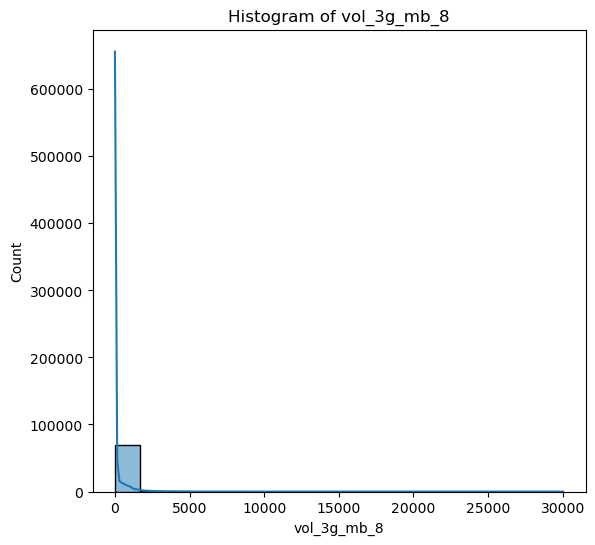


Univariate analysis for column: vol_3g_mb_7
Mean: 128.93444392062742
Median: 0.0
Variance: 307022.45693993877
Std_dev: 554.0960719405424
Min: 0.0
Max: 28144.12
Skewness: 13.388064608576494
Kurtosis: 376.9148276896774


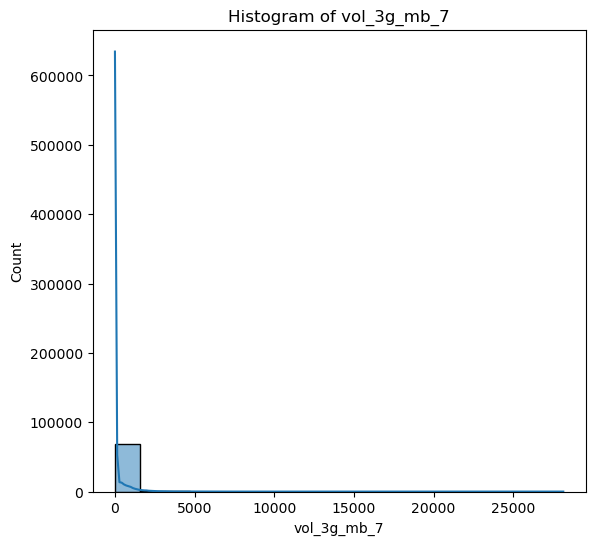


Univariate analysis for column: vol_3g_mb_6
Mean: 122.17188202688611
Median: 0.0
Variance: 307880.6780655323
Std_dev: 554.8699650057952
Min: 0.0
Max: 45735.4
Skewness: 18.900698386884876
Kurtosis: 916.6181701190209


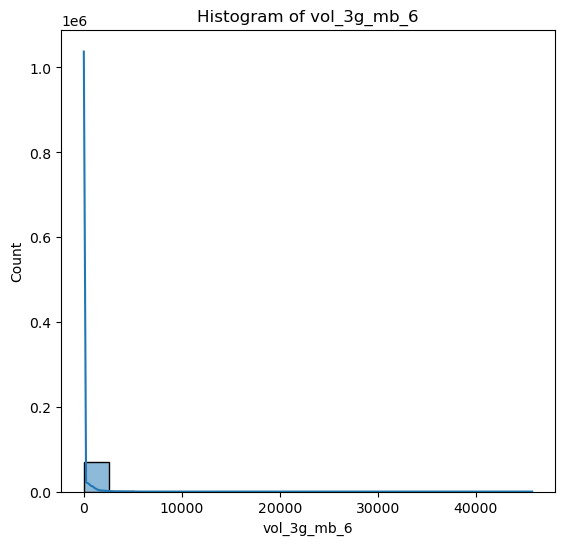


Univariate analysis for column: vol_2g_mb_8
Mean: 50.12750596437092
Median: 0.0
Variance: 45412.20785675007
Std_dev: 213.10140275641095
Min: 0.0
Max: 11117.61
Skewness: 10.475778610449058
Kurtosis: 234.95977590822258


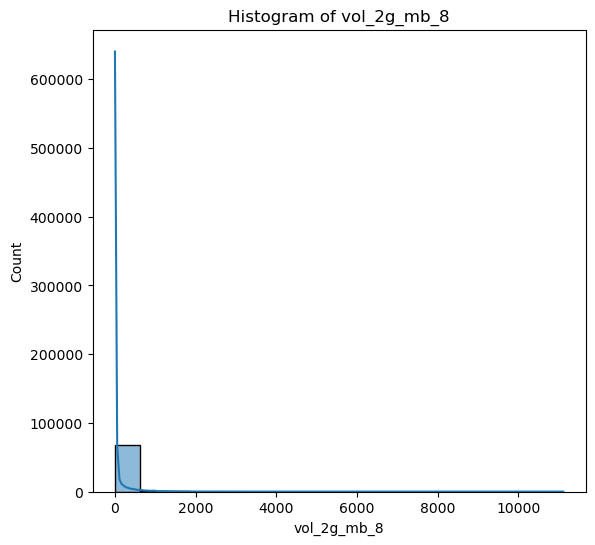


Univariate analysis for column: vol_2g_mb_7
Mean: 51.24020386005514
Median: 0.0
Variance: 44569.40268027872
Std_dev: 211.11466713679255
Min: 0.0
Max: 7873.55
Skewness: 8.569485657575038
Kurtosis: 122.86492625064936


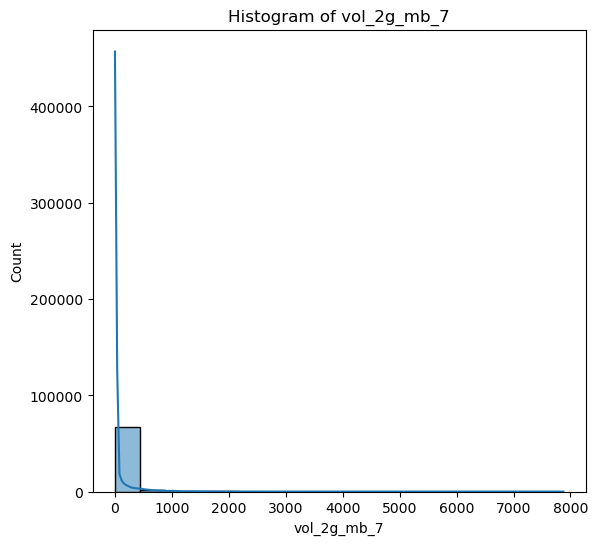


Univariate analysis for column: vol_2g_mb_6
Mean: 51.773924341776315
Median: 0.0
Variance: 45162.16152002573
Std_dev: 212.51390900368315
Min: 0.0
Max: 10285.9
Skewness: 9.641917093166905
Kurtosis: 189.5531714972709


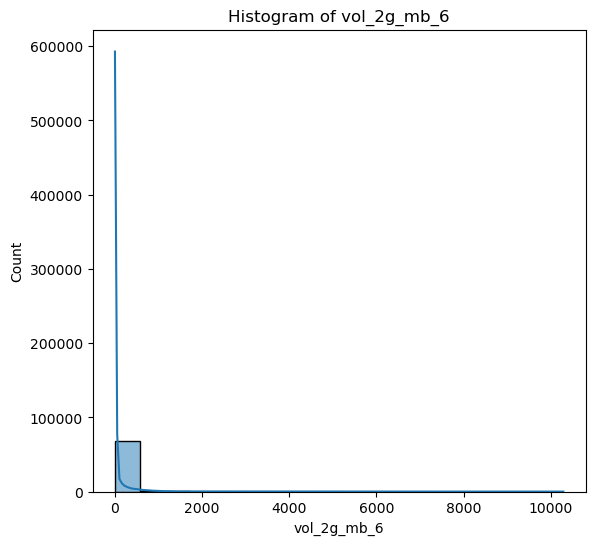

{'vol_3g_mb_8': {'mean': 135.486540950585,
  'median': 0.0,
  'variance': 322976.5218900441,
  'std_dev': 568.3102338424359,
  'min': 0.0,
  'max': 30036.06,
  'skewness': 13.911735392464298,
  'kurtosis': 434.74169918605816},
 'vol_3g_mb_7': {'mean': 128.93444392062742,
  'median': 0.0,
  'variance': 307022.45693993877,
  'std_dev': 554.0960719405424,
  'min': 0.0,
  'max': 28144.12,
  'skewness': 13.388064608576494,
  'kurtosis': 376.9148276896774},
 'vol_3g_mb_6': {'mean': 122.17188202688611,
  'median': 0.0,
  'variance': 307880.6780655323,
  'std_dev': 554.8699650057952,
  'min': 0.0,
  'max': 45735.4,
  'skewness': 18.900698386884876,
  'kurtosis': 916.6181701190209},
 'vol_2g_mb_8': {'mean': 50.12750596437092,
  'median': 0.0,
  'variance': 45412.20785675007,
  'std_dev': 213.10140275641095,
  'min': 0.0,
  'max': 11117.61,
  'skewness': 10.475778610449058,
  'kurtosis': 234.95977590822258},
 'vol_2g_mb_7': {'mean': 51.24020386005514,
  'median': 0.0,
  'variance': 44569.4026802

In [139]:
univariate_analysis(train_impute, vol_usage_columns)


Univariate analysis for column: monthly_2g_6
Frequency Distribution:
monthly_2g_6
0    64896
1     4688
2      389
3       20
4        6
Name: count, dtype: int64

Proportion of Each Category:
monthly_2g_6
0    0.927099
1    0.066972
2    0.005557
3    0.000286
4    0.000086
Name: proportion, dtype: float64


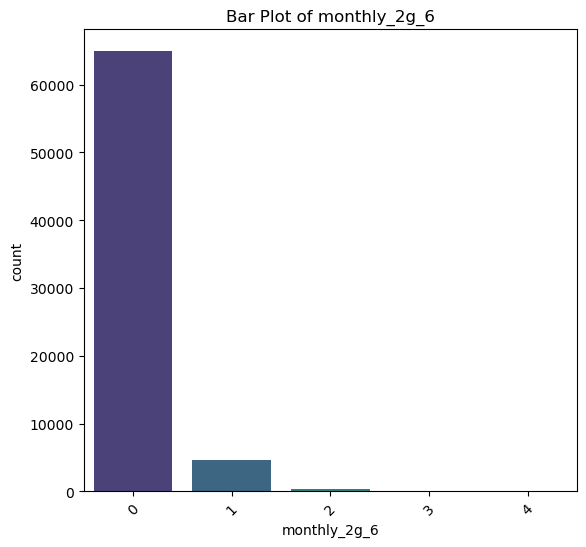


Univariate analysis for column: monthly_2g_7
Frequency Distribution:
monthly_2g_7
0    64695
1     4806
2      467
3       27
4        3
5        1
Name: count, dtype: int64

Proportion of Each Category:
monthly_2g_7
0    0.924227
1    0.068658
2    0.006672
3    0.000386
4    0.000043
5    0.000014
Name: proportion, dtype: float64


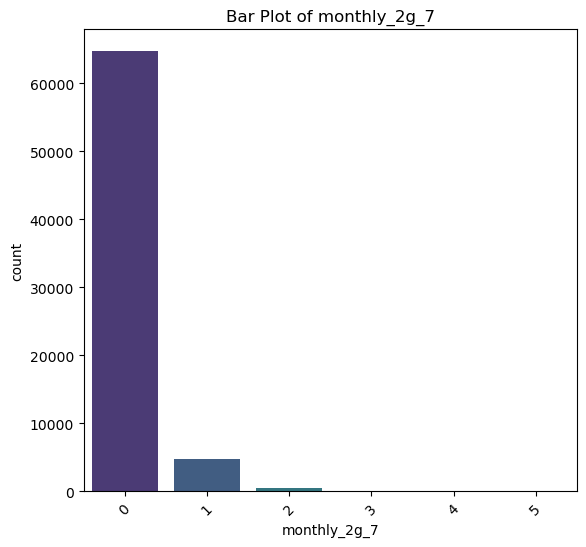


Univariate analysis for column: monthly_2g_8
Frequency Distribution:
monthly_2g_8
0    64817
1     4738
2      413
3       24
4        6
5        1
Name: count, dtype: int64

Proportion of Each Category:
monthly_2g_8
0    0.925970
1    0.067687
2    0.005900
3    0.000343
4    0.000086
5    0.000014
Name: proportion, dtype: float64


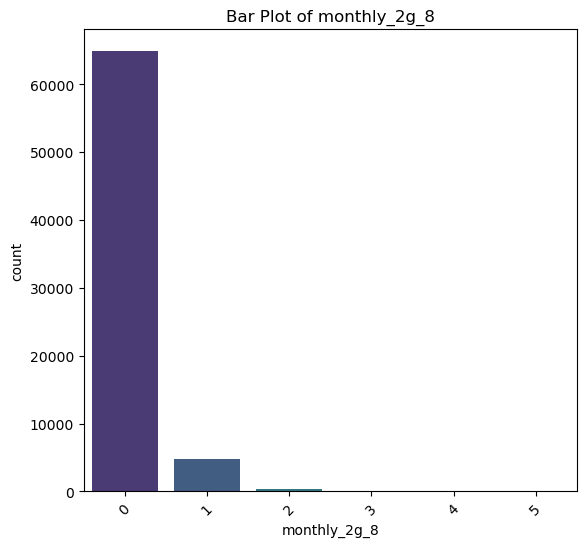


Univariate analysis for column: monthly_3g_6
Frequency Distribution:
monthly_3g_6
0    65990
1     3150
2      595
3      167
4       59
5       16
6       10
7        8
8        2
9        2
Name: count, dtype: int64

Proportion of Each Category:
monthly_3g_6
0    0.942728
1    0.045001
2    0.008500
3    0.002386
4    0.000843
5    0.000229
6    0.000143
7    0.000114
8    0.000029
9    0.000029
Name: proportion, dtype: float64


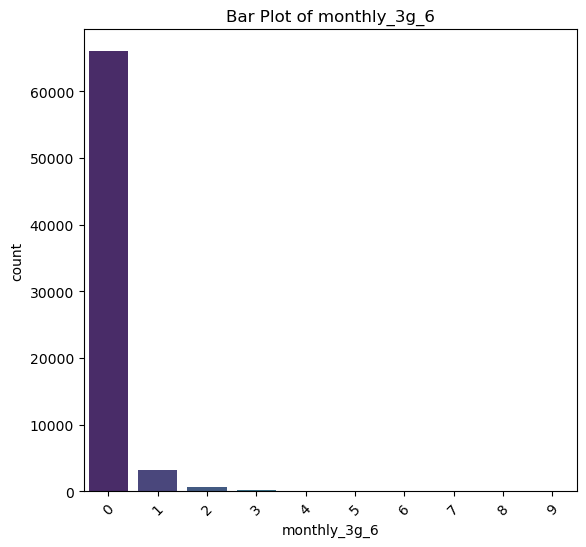


Univariate analysis for column: monthly_3g_7
Frequency Distribution:
monthly_3g_7
0     66062
1      2954
2       711
3       163
4        48
5        27
6        18
7         6
8         4
9         3
10        1
14        1
16        1
Name: count, dtype: int64

Proportion of Each Category:
monthly_3g_7
0     0.943756
1     0.042201
2     0.010157
3     0.002329
4     0.000686
5     0.000386
6     0.000257
7     0.000086
8     0.000057
9     0.000043
10    0.000014
14    0.000014
16    0.000014
Name: proportion, dtype: float64


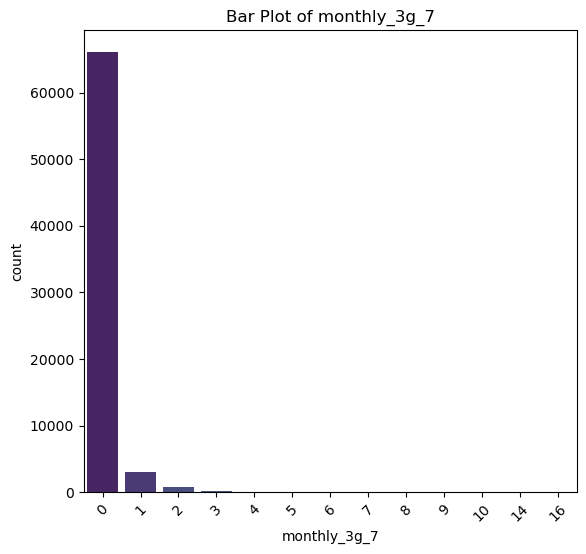


Univariate analysis for column: monthly_3g_8
Frequency Distribution:
monthly_3g_8
0     65789
1      3180
2       738
3       183
4        65
5        24
6         7
7         6
8         3
9         2
10        1
16        1
Name: count, dtype: int64

Proportion of Each Category:
monthly_3g_8
0     0.939856
1     0.045429
2     0.010543
3     0.002614
4     0.000929
5     0.000343
6     0.000100
7     0.000086
8     0.000043
9     0.000029
10    0.000014
16    0.000014
Name: proportion, dtype: float64


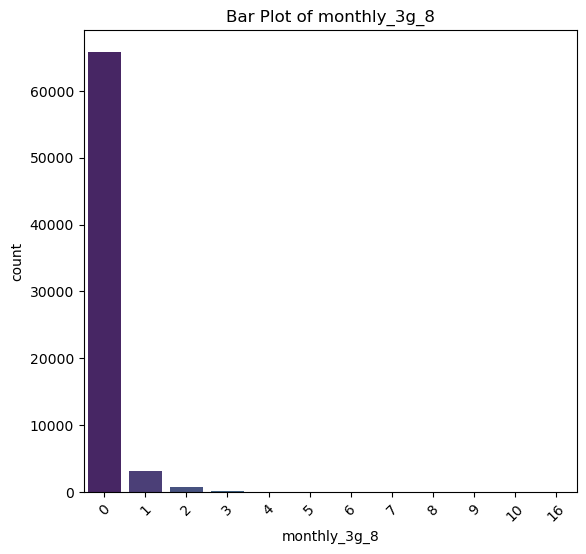


Univariate analysis for column: sachet_3g_6
Frequency Distribution:
sachet_3g_6
0     67088
1      2067
2       427
3       149
4        76
5        46
7        36
6        34
8        17
9        16
11       10
10        7
15        4
12        3
13        3
14        3
19        3
23        3
22        2
29        2
16        1
17        1
18        1
Name: count, dtype: int64

Proportion of Each Category:
sachet_3g_6
0     0.958414
1     0.029529
2     0.006100
3     0.002129
4     0.001086
5     0.000657
7     0.000514
6     0.000486
8     0.000243
9     0.000229
11    0.000143
10    0.000100
15    0.000057
12    0.000043
13    0.000043
14    0.000043
19    0.000043
23    0.000043
22    0.000029
29    0.000029
16    0.000014
17    0.000014
18    0.000014
Name: proportion, dtype: float64


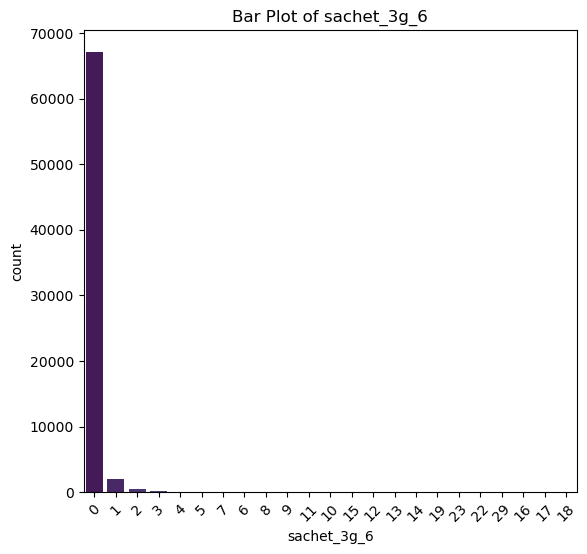


Univariate analysis for column: sachet_3g_7
Frequency Distribution:
sachet_3g_7
0     67101
1      1951
2       457
3       166
4        87
5        72
6        49
7        27
8        14
11       12
9        11
10       11
12        9
14        6
15        5
20        3
22        3
18        3
24        2
13        2
19        2
17        2
21        1
16        1
31        1
33        1
Name: count, dtype: int64

Proportion of Each Category:
sachet_3g_7
0     0.958599
1     0.027872
2     0.006529
3     0.002371
4     0.001243
5     0.001029
6     0.000700
7     0.000386
8     0.000200
11    0.000171
9     0.000157
10    0.000157
12    0.000129
14    0.000086
15    0.000071
20    0.000043
22    0.000043
18    0.000043
24    0.000029
13    0.000029
19    0.000029
17    0.000029
21    0.000014
16    0.000014
31    0.000014
33    0.000014
Name: proportion, dtype: float64


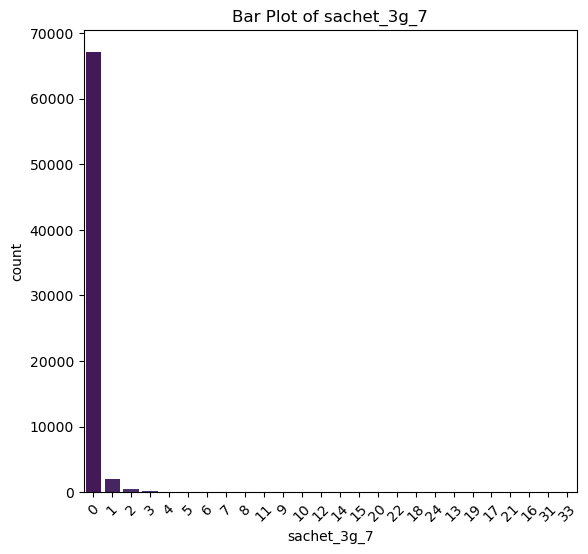


Univariate analysis for column: sachet_3g_8
Frequency Distribution:
sachet_3g_8
0     67059
1      1969
2       435
3       189
4        93
5        76
6        36
7        31
8        25
9        16
10       13
12       10
11        9
13        9
15        5
18        3
20        3
14        3
16        3
17        2
21        2
23        2
19        1
25        1
29        1
30        1
38        1
41        1
Name: count, dtype: int64

Proportion of Each Category:
sachet_3g_8
0     0.957999
1     0.028129
2     0.006214
3     0.002700
4     0.001329
5     0.001086
6     0.000514
7     0.000443
8     0.000357
9     0.000229
10    0.000186
12    0.000143
11    0.000129
13    0.000129
15    0.000071
18    0.000043
20    0.000043
14    0.000043
16    0.000043
17    0.000029
21    0.000029
23    0.000029
19    0.000014
25    0.000014
29    0.000014
30    0.000014
38    0.000014
41    0.000014
Name: proportion, dtype: float64


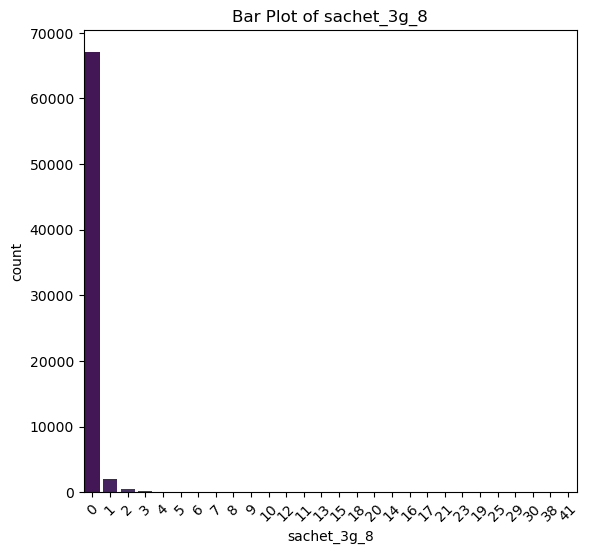


Univariate analysis for column: churn_probability
Frequency Distribution:
churn_probability
0    62867
1     7132
Name: count, dtype: int64

Proportion of Each Category:
churn_probability
0    0.898113
1    0.101887
Name: proportion, dtype: float64


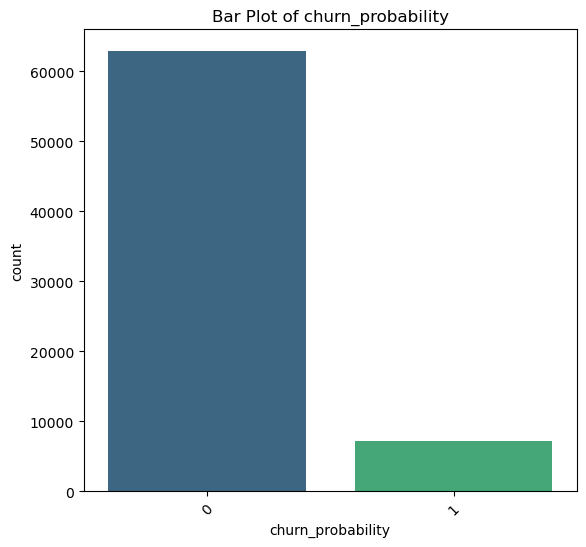


Univariate analysis for column: Churn
Frequency Distribution:
Churn
0    62867
1     7132
Name: count, dtype: int64

Proportion of Each Category:
Churn
0    0.898113
1    0.101887
Name: proportion, dtype: float64


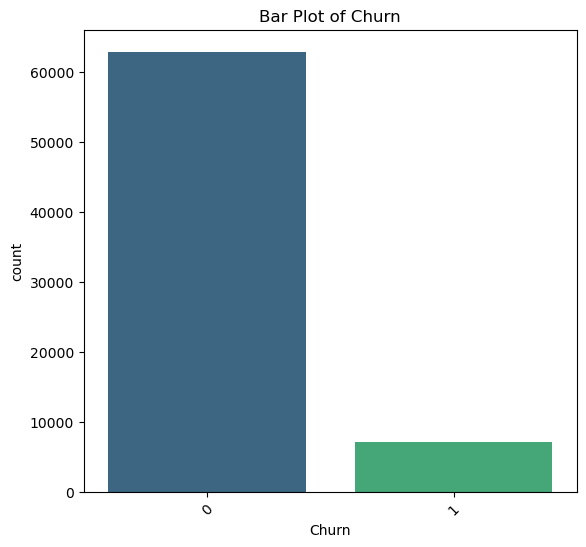

{'monthly_2g_6': {'frequency': monthly_2g_6
  0    64896
  1     4688
  2      389
  3       20
  4        6
  Name: count, dtype: int64,
  'proportion': monthly_2g_6
  0    0.927099
  1    0.066972
  2    0.005557
  3    0.000286
  4    0.000086
  Name: proportion, dtype: float64},
 'monthly_2g_7': {'frequency': monthly_2g_7
  0    64695
  1     4806
  2      467
  3       27
  4        3
  5        1
  Name: count, dtype: int64,
  'proportion': monthly_2g_7
  0    0.924227
  1    0.068658
  2    0.006672
  3    0.000386
  4    0.000043
  5    0.000014
  Name: proportion, dtype: float64},
 'monthly_2g_8': {'frequency': monthly_2g_8
  0    64817
  1     4738
  2      413
  3       24
  4        6
  5        1
  Name: count, dtype: int64,
  'proportion': monthly_2g_8
  0    0.925970
  1    0.067687
  2    0.005900
  3    0.000343
  4    0.000086
  5    0.000014
  Name: proportion, dtype: float64},
 'monthly_3g_6': {'frequency': monthly_3g_6
  0    65990
  1     3150
  2      595
  3    

In [140]:
univariate_categorical_analysis(train_impute, categorical_columns)

# Bivariate Analysis

<Axes: xlabel='total_og_mou_6', ylabel='total_og_mou_8'>

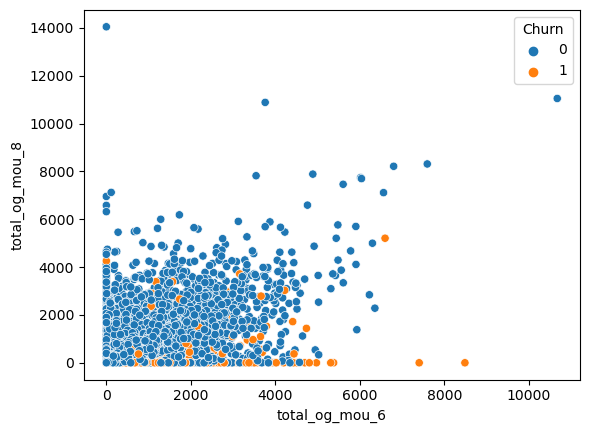

In [417]:
sns.scatterplot(x=train_impute['total_og_mou_6'],y=train_impute['total_og_mou_8'],hue=train_impute['Churn'])

<Axes: xlabel='total_og_mou_6', ylabel='total_og_mou_8'>

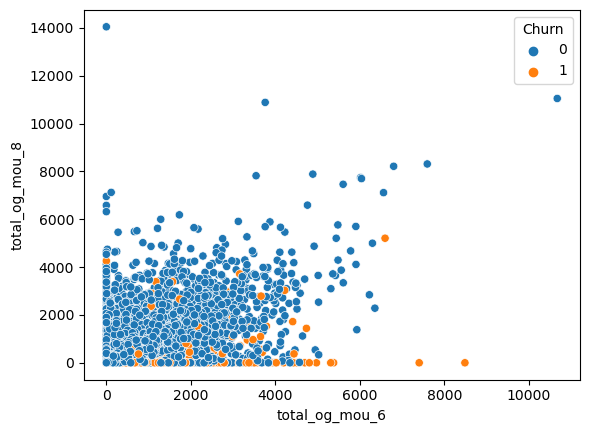

In [327]:
sns.scatterplot(x=train_impute['total_og_mou_6'],y=train_impute['total_og_mou_8'],hue=train_impute['Churn'])

<Axes: xlabel='aon', ylabel='total_og_mou_8'>

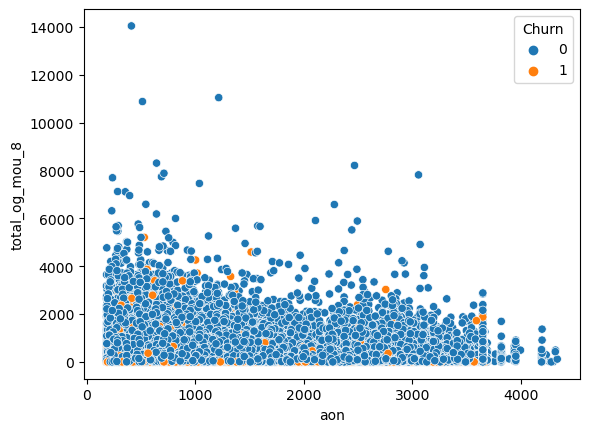

In [328]:
sns.scatterplot(x=train_impute['aon'],y=train_impute['total_og_mou_8'],hue=train_impute['Churn'])

<Axes: xlabel='aon', ylabel='total_ic_mou_8'>

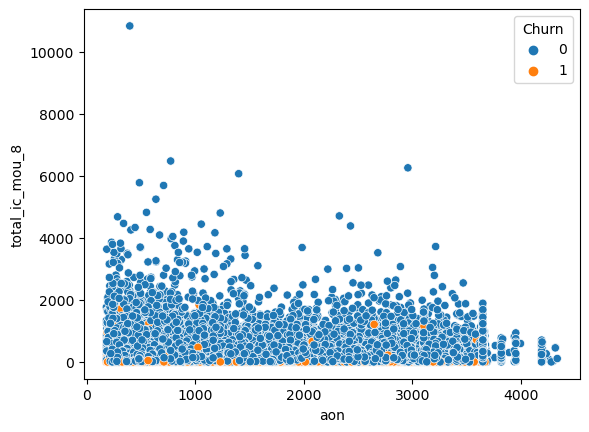

In [329]:
sns.scatterplot(x=train_impute['aon'],y=train_impute['total_ic_mou_8'],hue=train_impute['Churn'])

<Axes: xlabel='max_rech_amt_6', ylabel='max_rech_amt_8'>

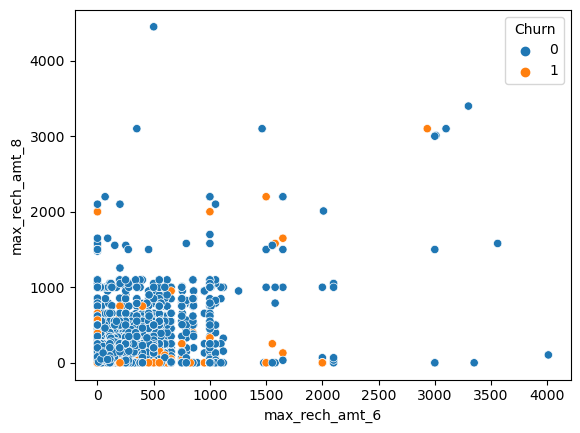

In [330]:
sns.scatterplot(x=train_impute['max_rech_amt_6'],y=train_impute['max_rech_amt_8'],hue=train_impute['Churn'])

In [331]:
def count_outliers(df):
    for column in df.columns:
        # Calculate Q1 and Q3
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        
        # Calculate IQR
        IQR = Q3 - Q1
        
        # Define outliers as values outside 1.5*IQR range
        outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
        
        # Count outliers
        outlier_count = outliers.shape[0]
        
        print(f"Outlier count for {column}: {outlier_count}")

In [332]:
count_outliers(train_impute)


Outlier count for arpu_6: 4055
Outlier count for arpu_7: 4018
Outlier count for arpu_8: 3835
Outlier count for onnet_mou_6: 7879
Outlier count for onnet_mou_7: 8107
Outlier count for onnet_mou_8: 8058
Outlier count for offnet_mou_6: 6032
Outlier count for offnet_mou_7: 6320
Outlier count for offnet_mou_8: 6240
Outlier count for roam_ic_mou_6: 15659
Outlier count for roam_ic_mou_7: 12172
Outlier count for roam_ic_mou_8: 12352
Outlier count for roam_og_mou_6: 15771
Outlier count for roam_og_mou_7: 12202
Outlier count for roam_og_mou_8: 12280
Outlier count for loc_og_t2t_mou_6: 7041
Outlier count for loc_og_t2t_mou_7: 6983
Outlier count for loc_og_t2t_mou_8: 7005
Outlier count for loc_og_t2m_mou_6: 6040
Outlier count for loc_og_t2m_mou_7: 6033
Outlier count for loc_og_t2m_mou_8: 6025
Outlier count for loc_og_t2f_mou_6: 10381
Outlier count for loc_og_t2f_mou_7: 10300
Outlier count for loc_og_t2f_mou_8: 10266
Outlier count for loc_og_t2c_mou_6: 15405
Outlier count for loc_og_t2c_mou_7: 1629

AssertionError: 

In [418]:
categorical_columns

array(['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_3g_6',
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'Churn'], dtype=object)

In [ ]:
column_for_dummy=['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'monthly_3g_6',
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8']

dummy_vars = pd.get_dummies(train_impute[column_for_dummy], drop_first=False, prefix=column_for_dummy, prefix_sep='_')
dummy_vars.head()

# concatenating dummy variables with original 'data'
train_impute.drop(columns=categorical_columns, inplace=True) # dropping original categorical columns
train_impute = pd.concat([train_impute, dummy_vars], axis=1)
train_impute.head()

# Observation
We can see almost every columns has some outliers, while most of them are becuase there are 0.0 as the service was not used some are actual outliers
Since we don't have actuall bussines people to check the factfulness of the data, we will cap those features

In [428]:
train_impute_dup = train_impute.copy()



In [429]:
y = train_impute_dup['Churn']
X = train_impute_dup.drop('Churn', axis=1)

# Standardization


In [430]:
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])

# Handling Class Imbalance

In [431]:
train_impute.Churn.value_counts()

Churn
0    62867
1     7132
Name: count, dtype: int64

In [121]:
pip install imblearn==0.10.1

ERROR: Could not find a version that satisfies the requirement imblearn==0.10.1 (from versions: 0.0)
ERROR: No matching distribution found for imblearn==0.10.1
Note: you may need to restart the kernel to use updated packages.


In [432]:
from sklearn.utils import resample

# Separate majority and minority classes
majority = X[y == 0]
minority = X[y == 1]

# Upsample minority class
minority_res = resample(minority, replace=True, n_samples=len(majority), random_state=42)

# Combine resampled minority class with majority class
X_res = np.concatenate([majority, minority_res])
y_res = np.concatenate([np.zeros(len(majority)), np.ones(len(minority_res))])

In [433]:
print("Before resampling:")
print(pd.Series(y).value_counts())

# Resampling code here...

print("After resampling:")
print(pd.Series(y_res).value_counts())

Before resampling:
Churn
0    62867
1     7132
Name: count, dtype: int64
After resampling:
0.0    62867
1.0    62867
Name: count, dtype: int64


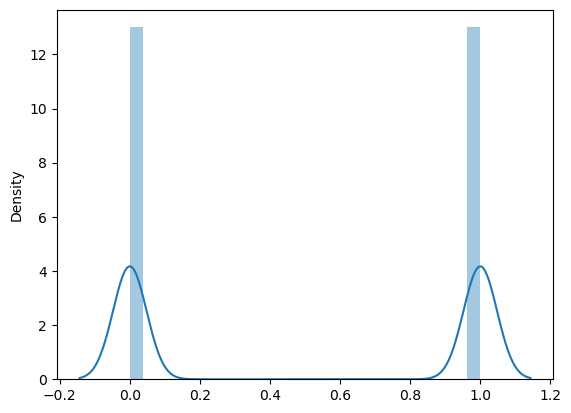

In [434]:
sns.distplot(y_res)
plt.show()

In [426]:
X.shape

(69999, 125)

In [435]:
from sklearn.decomposition import PCA

pca = PCA(n_components=25)
X_pca = pca.fit_transform(X_res)
X_pca.shape

(125734, 25)

# 1. Logistic Regression

In [135]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, train_size=0.7, test_size=0.3, random_state=25)

In [136]:
import statsmodels.api as sm

# Initial logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

/Users/kajalmahata/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/kajalmahata/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/kajalmahata/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/kajalmahata/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may no

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                88013
Model:                            GLM   Df Residuals:                    87887
Model Family:                Binomial   Df Model:                          125
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.7978e-09
Date:                Wed, 14 Aug 2024   Deviance:                   3.4395e-09
Time:                        19:41:27   Pearson chi2:                 1.72e-09
No. Iterations:                    30   Pseudo R-squ. (CS):             0.7500
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -25.1337   1.87e+04     -0.001      0.999   -3.66e+04    3.66e+04
x1          9.533e-14   5.12e+04   1.86e-18      1.000      -1e+05       1e+05
x2         -1.246e-13   6.25e+04  -1.99e-18      1.000   -1.22e+05    1.22e+05
x3         -1.585e-14    6.5e+04  -2.44e-19      1.000   -1.27e+05    1.27e+05
x4          1.041e-13   5.62e+05   1.85e-19      1.000    -1.1e+06     1.1e+06
x5          3.421e-14   7.42e+05   4.61e-20      1.000   -1.45e+06    1.45e+06
x6         -2.062e-13   7.98e+05  -2.58e-19      1.000   -1.56e+06    1.56e+06
x7         -3.612e-14   5.65e+05   -6.4e-20      1.000   -1.11e+06    1.11e+06
x8          9.087e-14    7.2e+05   1.26e-19      1.000   -1.41e+06    1.41e+06
x9          -8.74e-14   7.96e+05   -1.1e-19      1.000   -1.56e+06    1.56e+06
x10         3.492e-14   1.56e+04   2.25e-18      1.000   -3.05e+04    3.05e+04
x11        -4.583e-15   1.79e+04  -2.56e-19      1.000   -3.51e+04    3.51e+04
x12         2.694e-15   1.75e+04   1.54e-19      1.000   -3.43e+04    3.43e+04
x13        -5.613e-14   1.34e+05   -4.2e-19      1.000   -2.62e+05    2.62e+05
x14        -4.181e-14   1.34e+05  -3.12e-19      1.000   -2.63e+05    2.63e+05
x15         7.053e-14   1.61e+05   4.37e-19      1.000   -3.16e+05    3.16e+05
x16         1.289e-11   4.15e+08   3.11e-20      1.000   -8.13e+08    8.13e+08
x17        -1.265e-10   4.37e+08   -2.9e-19      1.000   -8.56e+08    8.56e+08
x18         -1.41e-10   4.62e+08  -3.06e-19      1.000   -9.05e+08    9.05e+08
x19          9.86e-12   4.46e+08   2.21e-20      1.000   -8.75e+08    8.75e+08
x20        -1.255e-10   4.35e+08  -2.89e-19      1.000   -8.52e+08    8.52e+08
x21        -1.452e-10   4.61e+08  -3.15e-19      1.000   -9.03e+08    9.03e+08
x22          9.17e-13   3.67e+07    2.5e-20      1.000   -7.18e+07    7.18e+07
x23        -1.078e-11   3.83e+07  -2.82e-19      1.000    -7.5e+07     7.5e+07
x24        -1.268e-11   3.91e+07  -3.24e-19      1.000   -7.66e+07    7.66e+07
x25        -1.741e-14   1.64e+04  -1.06e-18      1.000   -3.22e+04    3.22e+04
x26         4.817e-15    1.7e+04   2.83e-19      1.000   -3.34e+04    3.34e+04
x27         1.086e-14    2.3e+04   4.71e-19      1.000   -4.52e+04    4.52e+04
x28        -1.947e-11   6.94e+08  -2.81e-20      1.000   -1.36e+09    1.36e+09
x29         1.994e-10   6.96e+08   2.87e-19      1.000   -1.36e+09    1.36e+09
x30         2.263e-10   7.38e+08   3.06e-19      1.000   -1.45e+09    1.45e+09
x31        -3.963e-10   9.21e+08  -4.31e-19      1.000    -1.8e+09     1.8e+09
x32         2.282e-10   1.02e+09   2.23e-19      1.000      -2e+09       2e+09
x33         7.106e-11   1.11e+09   6.43e-20      1.000   -2.17e+09    2.17e+09
x34        -3.902e-10   9.21e+08  -4.24e-19      1.000    -1.8e+09     1.8e+09
x35         2.301e-10   1.02e+09   2.24e-19      1.000   -2.01e+09    2.01e+09
x3

# Decission Tree

In [436]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_res, train_size=0.7, random_state=25)

In [437]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
# Initial classifier
intial_dt = DecisionTreeClassifier(random_state=42, max_depth=10)
intial_dt.fit(X_train, y_train)

# Train Accuracy
y_train_pred = intial_dt.predict(X_train)
print(f'Train accuracy : {metrics.accuracy_score(y_train, y_train_pred)}')

y_test_pred = intial_dt.predict(X_test)

# Print the report on test data
print(metrics.classification_report(y_test, y_test_pred))

Train accuracy : 0.8607819299421676
              precision    recall  f1-score   support

         0.0       0.87      0.80      0.83     18774
         1.0       0.82      0.88      0.85     18947

    accuracy                           0.84     37721
   macro avg       0.84      0.84      0.84     37721
weighted avg       0.84      0.84      0.84     37721



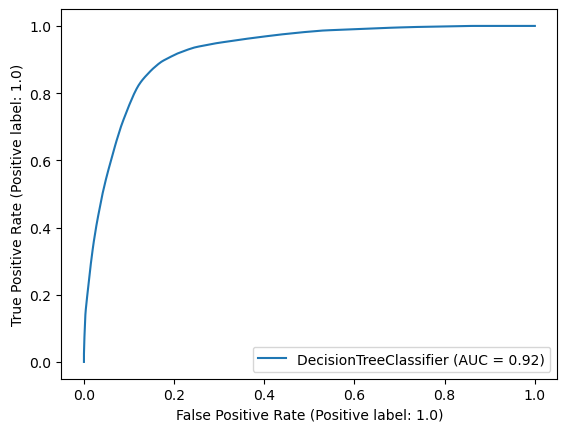

In [438]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(intial_dt, X_train, y_train)
plt.show()

In [439]:
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(random_state=42)

# Define parameters
params = {
    "max_depth": [2, 3, 5, 10, 20, 30, 40, 50, 100],
    "min_samples_leaf": [5, 10, 20, 50, 100, 250, 500, 800, 1000],
    "min_samples_leaf" : [1, 5, 10, 25, 50, 100]
}

grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

# Perform gridsearch
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 54 candidates, totalling 216 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30, 40, 50, 100],
                         'min_samples_leaf': [1, 5, 10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [440]:
grid_search.best_score_

0.9411905002451988

In [441]:
# Best estimator
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=40, random_state=42)

In [442]:
y_train_pred = dt_best.predict(X_train)
y_test_pred = dt_best.predict(X_test)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95     18774
         1.0       0.91      1.00      0.95     18947

    accuracy                           0.95     37721
   macro avg       0.96      0.95      0.95     37721
weighted avg       0.96      0.95      0.95     37721



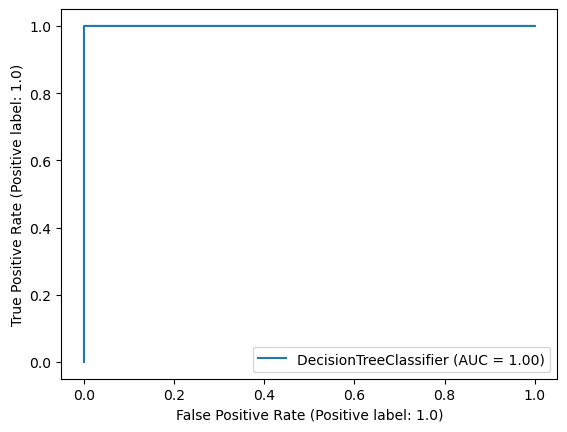

In [443]:

RocCurveDisplay.from_estimator(dt_best, X_train, y_train)
plt.show()

# Random Forest

Train accuracy : 0.8607819299421676
              precision    recall  f1-score   support

         0.0       0.88      0.84      0.86     18774
         1.0       0.85      0.88      0.87     18947

    accuracy                           0.86     37721
   macro avg       0.86      0.86      0.86     37721
weighted avg       0.86      0.86      0.86     37721



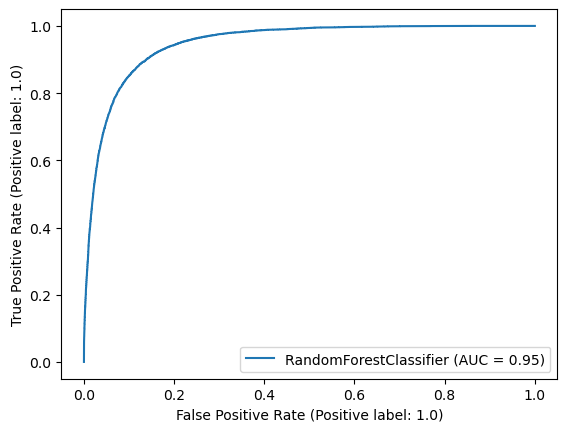

In [444]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=15, max_depth=10, max_features=5, random_state=25, oob_score=True)
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)

# Train Accuracy
y_train_pred = intial_dt.predict(X_train)
print(f'Train accuracy : {metrics.accuracy_score(y_train, y_train_pred)}')

y_test_pred = rf.predict(X_test)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

# Plotting ROC
RocCurveDisplay.from_estimator(rf, X_train, y_train)
plt.show()

In [445]:
rf = RandomForestClassifier(random_state=25, n_jobs=-1)

# Define parameters
params = {
    'max_depth': [2, 3, 5, 10, 20, 30],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'n_estimators': [10, 25, 50, 100]
}

grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=25),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20, 30],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [446]:
grid_search.best_score_

0.9469169130834343

In [447]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=30, min_samples_leaf=5, n_jobs=-1,
                       random_state=25)

In [448]:
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)

# Print the report
print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96     18774
         1.0       0.93      0.99      0.96     18947

    accuracy                           0.96     37721
   macro avg       0.96      0.96      0.96     37721
weighted avg       0.96      0.96      0.96     37721



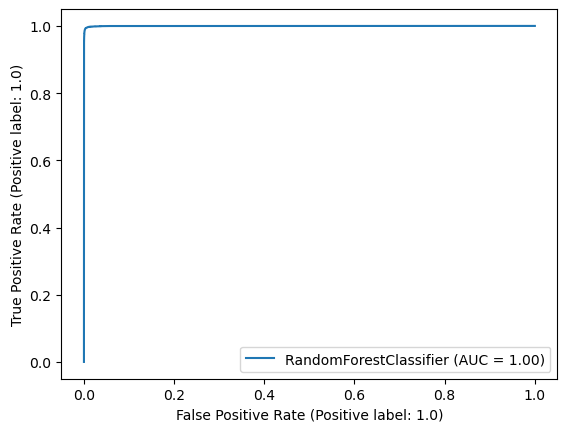

In [449]:
RocCurveDisplay.from_estimator(rf_best, X_train, y_train)
plt.show()


# Ada Boost

In [450]:
from sklearn.ensemble import AdaBoostClassifier
# Create a shallow tree as weak learner
shallow_tree = DecisionTreeClassifier(max_depth=2, random_state = 100)

# Fit the shallow decision tree 
shallow_tree.fit(X_train, y_train)

# Test error
y_pred = shallow_tree.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
score

0.6830677871742531

In [451]:
# Adaboost with shallow tree as base estimator

# Define the number of trees to be used or estimators
estimators = list(range(1, 150, 10))

# Loop through the estimators
adaboost_scores = []
for num_est in estimators:
    adaboost = AdaBoostClassifier(base_estimator=shallow_tree, n_estimators = num_est, random_state=25)
    
    adaboost.fit(X_train, y_train)
    y_pred = adaboost.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    adaboost_scores.append(score)

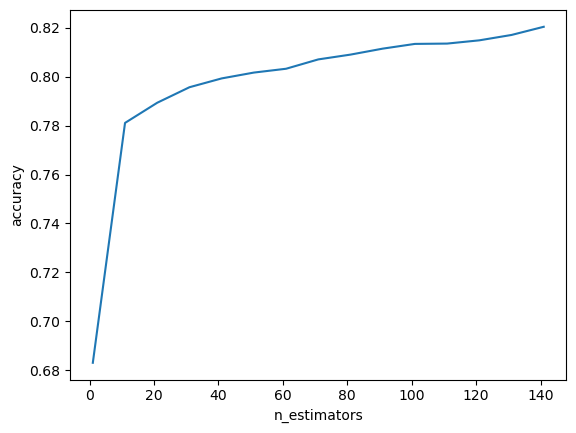

In [452]:
# Plot the scores corrosponding to number of estimators to find the best possible number of estimator
plt.plot(estimators, adaboost_scores)
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.show()


In [453]:
adaboost_best = AdaBoostClassifier(base_estimator=shallow_tree, n_estimators = 200, random_state=25)
adaboost_best.fit(X_train, y_train)
y_pred = adaboost_best.predict(X_test)

print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96     18774
         1.0       0.93      0.99      0.96     18947

    accuracy                           0.96     37721
   macro avg       0.96      0.96      0.96     37721
weighted avg       0.96      0.96      0.96     37721



In [454]:
final_model = RandomForestClassifier(max_depth=30, min_samples_leaf=5, n_jobs=-1,
                       random_state=25)

y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)



# Print the report
print("Report on train data")
print(metrics.classification_report(y_train, y_train_pred))

print("Report on test data")
print(metrics.classification_report(y_test, y_test_pred))

Report on train data
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     44093
         1.0       0.99      1.00      0.99     43920

    accuracy                           0.99     88013
   macro avg       0.99      0.99      0.99     88013
weighted avg       0.99      0.99      0.99     88013

Report on test data
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96     18774
         1.0       0.93      0.99      0.96     18947

    accuracy                           0.96     37721
   macro avg       0.96      0.96      0.96     37721
weighted avg       0.96      0.96      0.96     37721

